# Aim
* Identifying the target and features.
* Feature selection for each target
* Developing models for future predictions
* Creating additional features if necessary
* Model testing


In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv('D:\Synnax\dataset(1)\X_train.csv')
df.head(5)

,companyId,metadata_0,industry,sector,metadata_1,metadata_2,metadata_3,metadata_4,lastUpdatedAnnumEndDate,lastUpdatedQuarterEndDate,...,Y_0_feature_22,Y_0_feature_69,Y_0_feature_108,Y_0_feature_123,Y_0_feature_80,Y_0_feature_13,Y_0_feature_20,Y_0_feature_35,Y_0_feature_45,Y_0_feature_16
0,company_18887,US,Asset Management,Financial Services,0.003054,0.490076,0.003586,0.000486,2023-12-31,2024-03-31,...,8.458420e-09,0.001202,2.487104e-04,0.000063,0.000065,0.999062,0.000010,0.001340,0.000270,0.015111
1,company_14024,CA,"Furnishings, Fixtures & Appliances",Consumer Cyclical,NaN,0.489839,0.000016,0.000048,2023-12-31,2024-03-31,...,6.552366e-06,0.001189,5.385571e-05,0.000132,0.000206,0.998454,0.000284,0.001227,0.000258,0.015089
2,company_12659,SE,Electrical Equipment & Parts,Industrials,0.007253,0.486295,0.000016,0.000034,2023-12-31,2024-03-31,...,6.899561e-07,0.001178,8.217764e-06,0.000092,0.000012,0.999051,0.000010,0.001212,0.000237,0.015103
3,company_4637,IN,Building Products & Equipment,Industrials,0.000382,NaN,0.000001,0.000014,2024-03-31,2024-03-31,...,8.458420e-09,0.001176,8.871565e-07,0.000063,0.000007,0.999062,0.000010,0.001212,0.000235,0.015090
4,company_10738,US,Biotechnology,Healthcare,NaN,0.485822,0.000802,0.000025,2023-12-31,2024-03-31,...,1.350784e-07,0.001189,8.511356e-05,0.000063,0.000006,0.999062,0.000010,0.001432,0.000245,0.015023


In [3]:
print(f"There are {df.shape[0]} samples in the dataset.")

There are 19733 samples in the dataset.


In [4]:
X_test = pd.read_csv('D:\Synnax\dataset(1)\X_forward_looking.csv')
X_test.shape

(24119, 1147)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
metadata_1,12979.0,0.002332,0.016998,0.0,0.000000,0.000382,0.001527,1.000000
metadata_2,10230.0,0.487078,0.010268,0.0,0.486059,0.486295,0.487949,0.805293
metadata_3,19708.0,0.002426,0.015555,0.0,0.000003,0.000088,0.001312,1.000000
metadata_4,19588.0,0.001165,0.014832,0.0,0.000015,0.000081,0.000300,1.000000
metadata_5,19616.0,0.000355,0.007138,0.0,0.000305,0.000305,0.000305,1.000000
...,...,...,...,...,...,...,...,...
Y_0_feature_13,19733.0,0.998499,0.010434,0.0,0.999055,0.999062,0.999062,1.000000
Y_0_feature_20,19733.0,0.000600,0.012192,0.0,0.000010,0.000010,0.000010,1.000000
Y_0_feature_35,19733.0,0.001495,0.009118,0.0,0.001212,0.001223,0.001283,1.000000
Y_0_feature_45,19733.0,0.000422,0.007684,0.0,0.000235,0.000244,0.000277,1.000000


In [6]:
# creating datasets 
num_attr = [val for val in df.columns if df[val].dtype in (int,float)]

num_data = df[num_attr]
num_data.head(5)

,metadata_1,metadata_2,metadata_3,metadata_4,metadata_5,metadata_6,metadata_7,metadata_8,metadata_9,metadata_10,...,Y_0_feature_22,Y_0_feature_69,Y_0_feature_108,Y_0_feature_123,Y_0_feature_80,Y_0_feature_13,Y_0_feature_20,Y_0_feature_35,Y_0_feature_45,Y_0_feature_16
0,0.003054,0.490076,0.003586,0.000486,0.000305,0.102313,0.000000,NaN,0.682157,0.033284,...,8.458420e-09,0.001202,2.487104e-04,0.000063,0.000065,0.999062,0.000010,0.001340,0.000270,0.015111
1,NaN,0.489839,0.000016,0.000048,0.000305,0.102182,0.000796,NaN,0.682112,0.032963,...,6.552366e-06,0.001189,5.385571e-05,0.000132,0.000206,0.998454,0.000284,0.001227,0.000258,0.015089
2,0.007253,0.486295,0.000016,0.000034,0.000305,0.102182,0.000000,NaN,0.681979,0.032723,...,6.899561e-07,0.001178,8.217764e-06,0.000092,0.000012,0.999051,0.000010,0.001212,0.000237,0.015103
3,0.000382,NaN,0.000001,0.000014,0.000305,NaN,NaN,NaN,0.681973,0.032710,...,8.458420e-09,0.001176,8.871565e-07,0.000063,0.000007,0.999062,0.000010,0.001212,0.000235,0.015090
4,NaN,0.485822,0.000802,0.000025,0.000305,0.101921,NaN,NaN,0.681888,0.032341,...,1.350784e-07,0.001189,8.511356e-05,0.000063,0.000006,0.999062,0.000010,0.001432,0.000245,0.015023


In [8]:
#aliging target data with respective features.
target_data = pd.read_csv(r'D:\Synnax\dataset(1)\targets_train.csv')

def create_dataset(features,target):
    """Returns data with right features and target set."""
    new_data = {}
    for col in target.drop('companyId',axis=1).columns:
        col_data = pd.DataFrame()
        for column in features.columns:
            if  column.startswith('Q') or column.startswith('Y'):
                if column[-2:] == col[-2:]:           
                    col_data[column] = features[column]
            col_data[col] = target[col] 
            new_data[col] = col_data

    return new_data


dataset_dict = create_dataset(num_data,target_data)                

In [9]:
dataset_dict['target_43'].head()

,target_43,Q_4_feature_43,Q_3_feature_43,Q_2_feature_43,Q_1_feature_43,Y_3_feature_43,Y_2_feature_43,Y_1_feature_43,Y_0_feature_43
0,0.000477,0.008605,0.000945,0.008645,0.011175,0.000021,0.000042,0.000050,0.000024
1,0.000617,0.008748,0.001074,0.008793,0.011317,0.000287,0.000343,0.000240,0.000164
2,0.000468,0.008601,0.000942,0.008639,0.011169,0.000019,0.000039,0.000046,0.000020
3,0.000462,0.008594,0.000935,0.008632,0.011161,0.000011,0.000030,0.000038,0.000011
4,0.000460,0.008590,0.000931,0.008630,0.011159,0.000006,0.000023,0.000036,0.000009


In [10]:
target_7 = dataset_dict['target_7']
target_7.head()

,target_7,Q_4_feature_7,Q_3_feature_7,Q_2_feature_7,Q_1_feature_7,Y_3_feature_7,Y_2_feature_7,Y_1_feature_7,Y_0_feature_7
0,0.000030,5.505787e-05,2.518368e-05,2.550685e-05,5.349746e-05,5.110780e-05,1.001419e-04,1.036740e-04,5.349746e-05
1,0.000018,1.259920e-05,9.136653e-06,7.823649e-06,7.112249e-06,1.806688e-05,1.950164e-05,1.341209e-05,7.112249e-06
2,0.000011,9.627465e-07,5.056976e-07,3.301379e-07,1.701837e-06,4.037975e-06,3.370751e-06,1.594263e-06,1.701837e-06
3,0.000010,6.621408e-07,2.444315e-08,1.502463e-07,2.964200e-07,3.782727e-07,9.442077e-07,6.348607e-07,4.322586e-07
4,0.000068,9.608442e-05,7.075910e-05,6.419693e-05,5.775010e-05,1.704304e-04,1.110909e-04,9.676808e-05,5.775010e-05


In [11]:
def distplot(rows,columns,data,target):
    """Returns the distribution plots."""
    fig,ax = plt.subplots(nrows=rows,ncols=columns,sharey=True,figsize=(10,10))
    fig.suptitle("Distribution of data.")


    feature_data = data.drop([target],axis=1)
    axes = ax.flatten()  # flatten the 2D array of axes into a 1D array
    for i, col in enumerate(feature_data,start=-1):
        axes[i].scatter(feature_data[col], data[target])
        axes[i].set_title(col)  # set the title of each subplot to the column name
        axes[i].grid(True)
    plt.show()
    plt.tight_layout()


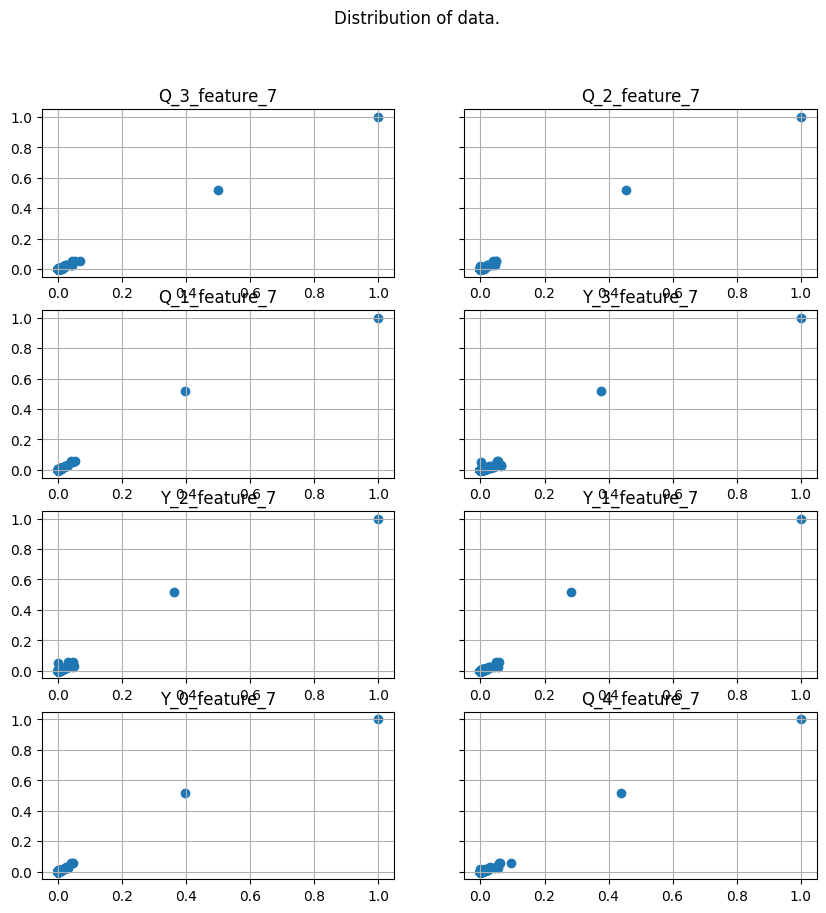

<Figure size 640x480 with 0 Axes>

In [12]:
distplot(4,2,target_7,'target_7')

In [13]:
X_7 = target_7.drop(['target_7'],axis=1)
Y_7 = target_7[['target_7']]

X_7.isna().sum()

Q_4_feature_7    0
Q_3_feature_7    0
Q_2_feature_7    0
Q_1_feature_7    0
Y_3_feature_7    0
Y_2_feature_7    0
Y_1_feature_7    0
Y_0_feature_7    0
dtype: int64

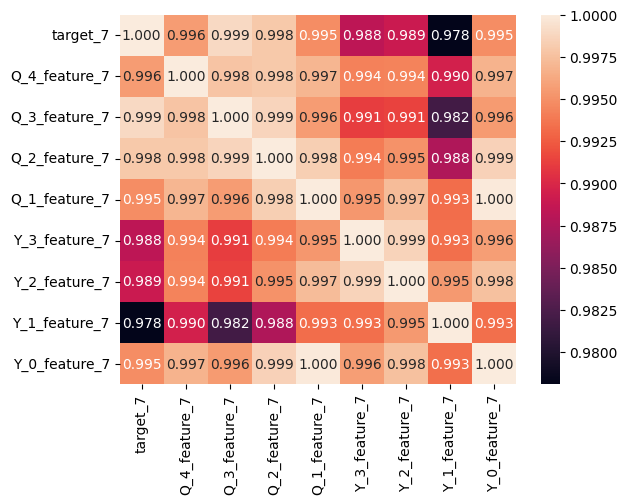

In [14]:
corr_7 = target_7.corr()
sb.heatmap(corr_7,annot=True,fmt='.3f')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score,mean_squared_error

xtrain_7,xtest_7,ytrain_7,ytest_7 = train_test_split(X_7,Y_7,test_size=0.25,random_state=12)
print(xtrain_7.shape)
print(xtest_7.shape)
print(ytrain_7.shape)
print(ytest_7.shape)

(14799, 8)
(4934, 8)
(14799, 1)
(4934, 1)


In [17]:
pls_reg = PLSRegression(n_components=4)
pls_reg.fit(xtrain_7,ytrain_7)

y7_train_pred = pls_reg.predict(xtrain_7)
y7_test_pred = pls_reg.predict(xtest_7)

print(f"r2 score on train set is {r2_score(ytrain_7,y7_train_pred)} and on test set is {r2_score(ytest_7,y7_test_pred)}")
print(f"MSE score on train set is {mean_squared_error(ytrain_7,y7_train_pred)} and on test set is {mean_squared_error(ytest_7,y7_test_pred)}")

r2 score on train set is 0.9997051629787671 and on test set is 0.96495546832142
MSE score on train set is 2.026924575115286e-08 and on test set is 1.9267441703688892e-06


In [19]:
pls_7 = PLSRegression(n_components=4)
pls_7.fit(X_7,Y_7)

PLSRegression(n_components=4)

In [20]:
def test_submission(train_data,model):
    test_features = []
    for col in train_data.columns:
        test_features.append(col)

    test_data = X_test[test_features]

    test_sub = model.predict(test_data)
    return test_sub

test_7 = test_submission(X_7,pls_7)

## target 43

In [21]:
target_43 = dataset_dict['target_43']
target_43.head()

,target_43,Q_4_feature_43,Q_3_feature_43,Q_2_feature_43,Q_1_feature_43,Y_3_feature_43,Y_2_feature_43,Y_1_feature_43,Y_0_feature_43
0,0.000477,0.008605,0.000945,0.008645,0.011175,0.000021,0.000042,0.000050,0.000024
1,0.000617,0.008748,0.001074,0.008793,0.011317,0.000287,0.000343,0.000240,0.000164
2,0.000468,0.008601,0.000942,0.008639,0.011169,0.000019,0.000039,0.000046,0.000020
3,0.000462,0.008594,0.000935,0.008632,0.011161,0.000011,0.000030,0.000038,0.000011
4,0.000460,0.008590,0.000931,0.008630,0.011159,0.000006,0.000023,0.000036,0.000009


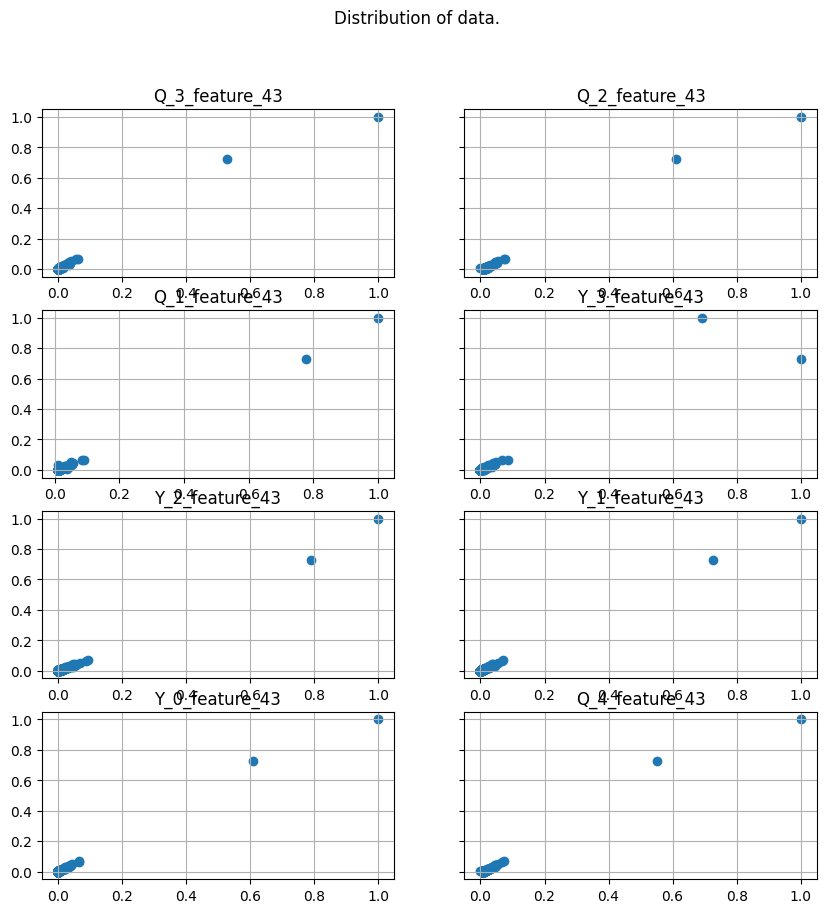

<Figure size 640x480 with 0 Axes>

In [22]:
distplot(4,2,target_43,'target_43')

In [23]:
X_43 = target_43.drop('target_43',axis=1)
Y_43 = target_43['target_43']

xtrain_43,xtest_43,ytrain_43,ytest_43 = train_test_split(X_43,Y_43,test_size=0.25,random_state=13)

In [24]:
pls_reg_43 = PLSRegression(n_components=4)
pls_reg_43.fit(xtrain_43,ytrain_43)

y43_train_pred = pls_reg_43.predict(xtrain_43)
y43_test_pred = pls_reg_43.predict(xtest_43)

print(f"r2 score on trainset is {r2_score(ytrain_43,y43_train_pred)} and on test set is {r2_score(ytest_43,y43_test_pred)}")
print(f"MSE score on trainset is {mean_squared_error(ytrain_43,y43_train_pred)} and on test set is {mean_squared_error(ytest_43,y43_test_pred)}")

r2 score on trainset is 0.9998403954056848 and on test set is 0.9848014368771199
MSE score on trainset is 1.676864280904474e-08 and on test set is 3.385103906255023e-08


In [25]:
pls_43 = PLSRegression(n_components=4)
pls_43.fit(X_43,Y_43)

PLSRegression(n_components=4)

In [26]:
test_43 = test_submission(X_43,pls_43)

## target 34

In [27]:
target_34 = dataset_dict['target_34']
target_34.head(5)

,target_34,Q_4_feature_134,Q_4_feature_34,Q_3_feature_134,Q_3_feature_34,Q_2_feature_134,Q_2_feature_34,Q_1_feature_134,Q_1_feature_34,Y_3_feature_134,Y_3_feature_34,Y_2_feature_134,Y_2_feature_34,Y_1_feature_134,Y_1_feature_34,Y_0_feature_134,Y_0_feature_34
0,0.000029,0.000491,0.000051,0.001091,0.000031,0.007178,0.000032,0.001976,0.000033,0.000066,0.000028,0.000460,0.000056,0.000311,0.000052,0.000109,0.000033
1,0.000076,0.000595,0.000107,0.001189,0.000102,0.007292,0.000092,0.002088,0.000089,0.000346,0.000213,0.000710,0.000281,0.000458,0.000121,0.000215,0.000089
2,0.000009,0.000471,0.000014,0.001072,0.000013,0.007151,0.000011,0.001950,0.000011,0.000042,0.000012,0.000432,0.000014,0.000292,0.000013,0.000087,0.000011
3,0.000004,0.000461,0.000005,0.001062,0.000000,0.007144,0.000005,0.001940,0.000000,0.000024,0.000006,0.000415,0.000006,0.000281,0.000006,0.000077,0.000005
4,0.000026,0.000457,0.000041,0.001058,0.000031,0.007139,0.000031,0.001937,0.000030,0.000018,0.000071,0.000407,0.000055,0.000276,0.000044,0.000073,0.000030


In [28]:
subset_col = []
for col in target_34.columns:
    if col.endswith('_34'):
        subset_col.append(col)

data_34 = target_34[subset_col]

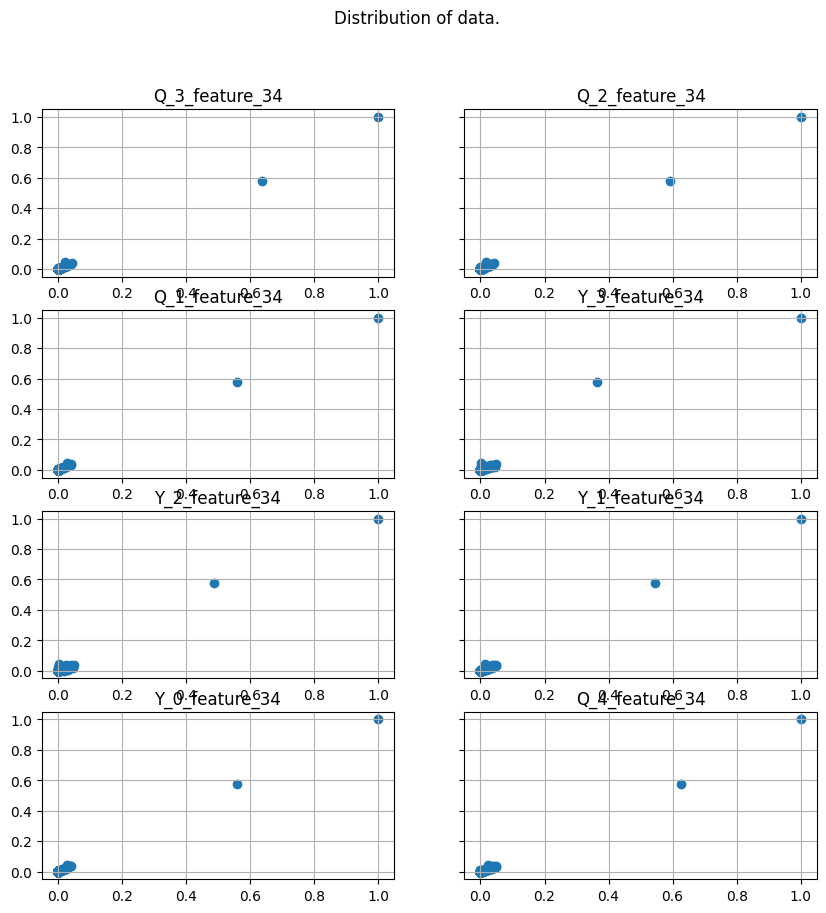

<Figure size 640x480 with 0 Axes>

In [29]:
distplot(4,2,data_34,'target_34')

In [30]:
X_34 = data_34.drop('target_34',axis=1)
Y_34 = data_34['target_34']

xtrain_34,xtest_34,ytrain_34,ytest_34 = train_test_split(X_34,Y_34,test_size=0.25,random_state=14)

In [31]:
pls_reg_34 = PLSRegression(n_components=4)
pls_reg_34.fit(xtrain_34,ytrain_34)

y34_pred_train = pls_reg_34.predict(xtrain_34)
y34_pred_test = pls_reg_34.predict(xtest_34)

print(f"r2 score for train set is {r2_score(ytrain_34,y34_pred_train)} and for test set is {r2_score(ytest_34,y34_pred_test)}")
print(f"MSE score on train set is {mean_squared_error(ytrain_34,y34_pred_train)} and for test set is {mean_squared_error(ytest_34,y34_pred_test)}")

r2 score for train set is 0.9997713712610294 and for test set is 0.9992546108186814
MSE score on train set is 1.569719822415101e-08 and for test set is 5.073063567432992e-08


In [32]:
pls_34 = PLSRegression(n_components=4)
pls_34.fit(X_34,Y_34)

PLSRegression(n_components=4)

In [33]:
test_34 = test_submission(X_34,pls_34)

## Target 4

In [34]:
target_4 = dataset_dict['target_4']
target_4.head()

,target_4,Q_4_feature_4,Q_3_feature_4,Q_2_feature_4,Q_1_feature_4,Y_3_feature_4,Y_2_feature_4,Y_1_feature_4,Y_0_feature_4
0,1.619132e-05,0.000410,3.888450e-04,3.863567e-04,0.000348,0.000331,3.704113e-04,0.000336,0.000359
1,8.285014e-05,0.001964,2.257626e-03,2.201657e-03,0.002000,0.005208,3.079819e-03,0.002173,0.002059
2,9.786690e-06,0.000000,5.834321e-07,6.839595e-07,0.000000,0.000000,2.364012e-07,0.000000,0.000000
3,5.672529e-06,0.000000,5.834321e-07,6.839595e-07,0.000000,0.000000,2.364012e-07,0.000000,0.000000
4,2.412113e-08,0.000000,5.834321e-07,6.839595e-07,0.000000,0.000000,2.364012e-07,0.000000,0.000000


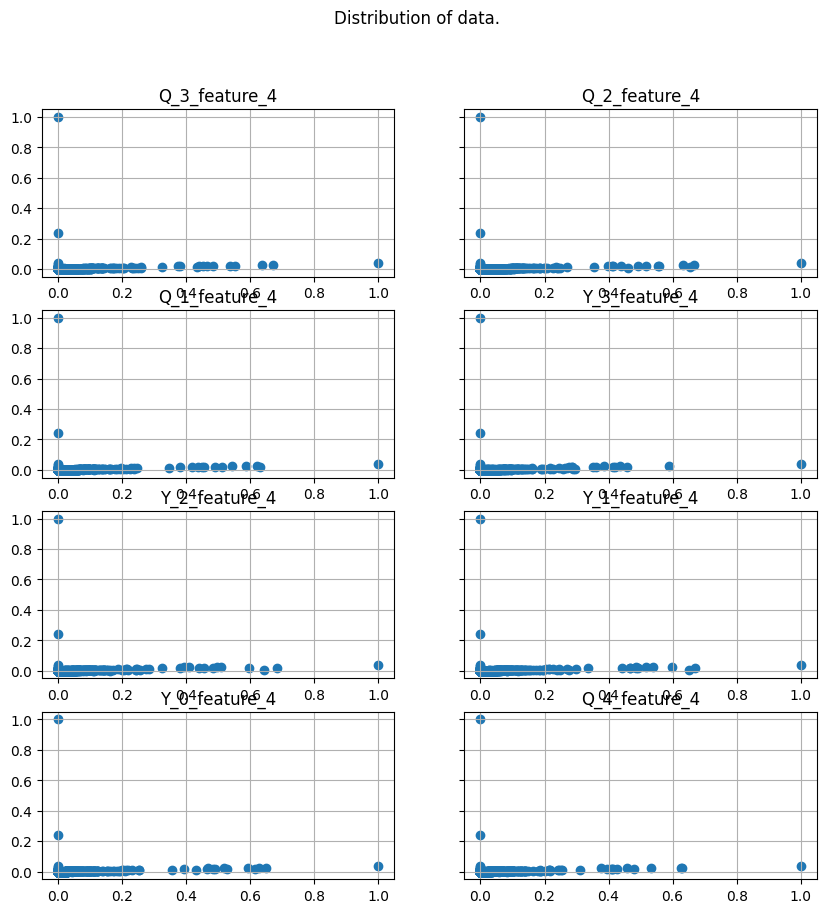

<Figure size 640x480 with 0 Axes>

In [35]:
distplot(4,2,target_4,'target_4')

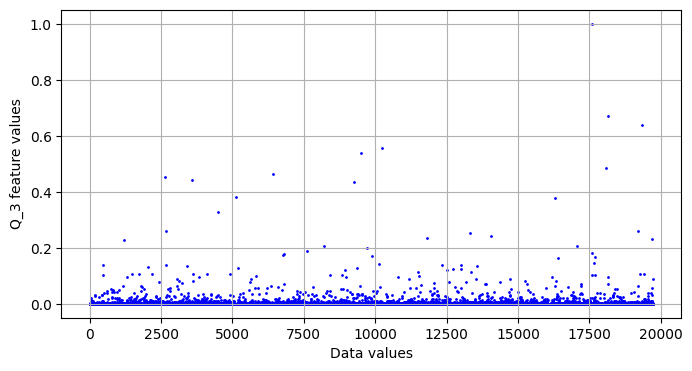

In [36]:
plt.figure(figsize=(8,4))
plt.scatter(range(target_4.shape[0]),target_4['Q_3_feature_4'],s=1,c='b')
plt.xlabel('Data values')
plt.ylabel('Q_3 feature values')
plt.grid(True)
plt.show()

In [31]:
# binning the data to categorize and generate clear structure.

#for col in target_4.drop('target_4',axis=1).columns:
#    target_4[col] = pd.cut(target_4[col],8,duplicates='drop',labels=[1,2,3,4,5,6,7,8])

#target_4.head()

In [32]:
#target_4['target_4'] = pd.cut(target_4['target_4'],4,duplicates='drop')

In [33]:
# counting values and mapping the values
#for col in target_4:
#    values = target_4[col].value_counts(normalize=True)
#    target_4[col] = target_4[col].map(values)

#values = target_4.target_4.value_counts(normalize=True)
#target_4['target_4'] = target_4['target_4'].map(values)

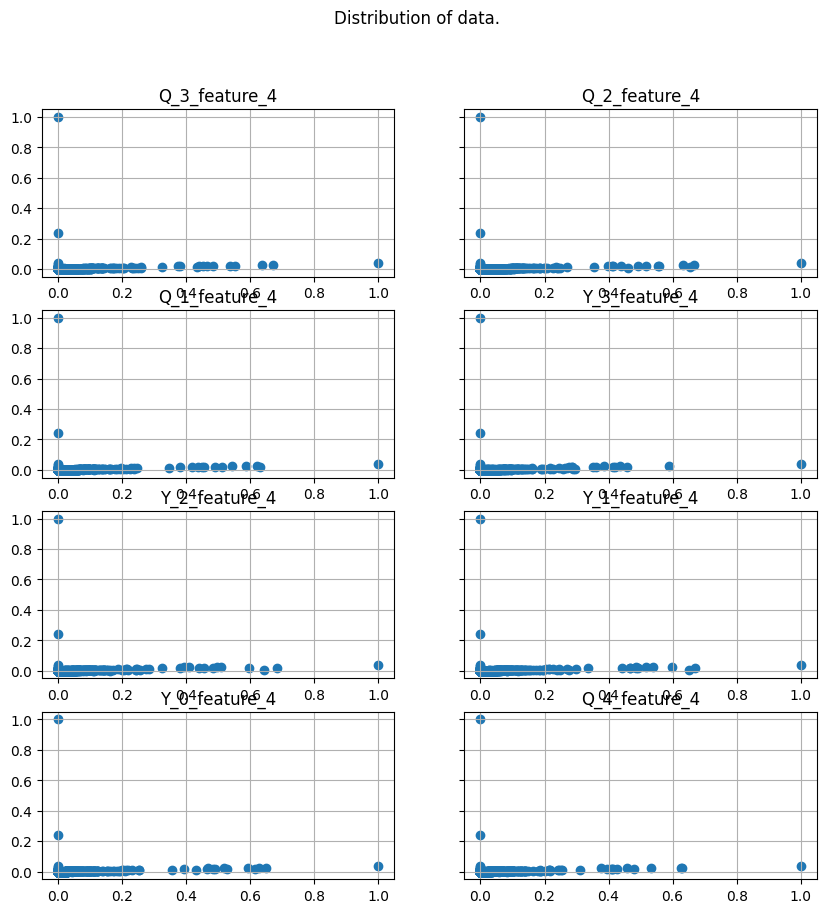

<Figure size 640x480 with 0 Axes>

In [34]:
distplot(4,2,target_4,'target_4')

In [37]:
# adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

X_4 = target_4.drop(['target_4'],axis=1)
Y_4 = target_4['target_4']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_4)
X_poly_rep = np.reciprocal(X_poly)
xtrain_4,xtest_4,ytrain_4,ytest_4 = train_test_split(X_4,Y_4,test_size=0.25,random_state=23)

In [42]:
pls_reg_4 = PLSRegression(n_components=4)
pls_reg_4.fit(xtrain_4,ytrain_4)

y4_pred_train = pls_reg_4.predict(xtrain_4)
y4_pred_test = pls_reg_4.predict(xtest_4)

X_train_trans = pls_reg_4.transform(xtrain_4)
X_test_trans = pls_reg_4.transform(xtest_4)

print(f"R2 score on train set {r2_score(ytrain_4,y4_pred_train)} and test set {r2_score(ytest_4,y4_pred_test)}")
print(f"MSE score on train set {mean_squared_error(ytrain_4,y4_pred_train)} and test set {mean_squared_error(ytest_4,y4_pred_test)}")

R2 score on train set 0.0060628588837229325 and test set 0.692877641027398
MSE score on train set 7.184651382298514e-05 and test set 1.962944637575817e-07


In [39]:
from sklearn.ensemble import RandomForestRegressor

rdclf = RandomForestRegressor(max_depth = 12, n_estimators = 150, min_samples_split = 3,random_state=10)
#rdclf.fit(X_4,Y_4)
#y4_pred_train_clf = rdclf.predict(xtrain_4)
#y4_pred_test_clf = rdclf.predict(xtest_4)

#print(f"R2 score on train set {r2_score(ytrain_4,y4_pred_train_clf)} and test set {r2_score(ytest_4,y4_pred_test_clf)}")
#print(f"MSE score on train set {mean_squared_error(ytrain_4,y4_pred_train_clf)} and test set {mean_squared_error(ytest_4,y4_pred_test_clf)}")


In [44]:
lgb_4 = LGBMRegressor(boosting_type ='gbdt',max_depth=11,num_leaves=60,learning_rate=0.01,n_estimators=200)
rdclf = RandomForestRegressor(max_depth = 12, n_estimators = 150, min_samples_split = 3,random_state=10)


stack_4 = StackingRegressor([
    ('pls',pls_reg_4),
    ('rd',rdclf)
])
stack_4.fit(xtrain_4,ytrain_4)

y4_train_pred = stack_4.predict(xtrain_4)
y4_test_pred = stack_4.predict(xtest_4)

print(f"R2 score on train set {r2_score(ytrain_4,y4_train_pred)} and test set {r2_score(ytest_4,y4_test_pred)}")
print(f"MSE score on train set {mean_squared_error(ytrain_4,y4_train_pred)} and test set {mean_squared_error(ytest_4,y4_test_pred)}")


R2 score on train set 0.0012150286633785257 and test set 0.12079788466490138
MSE score on train set 7.219693809684444e-05 and test set 5.619340393892668e-07


In [40]:
from sklearn.svm import SVR

svm = SVR(kernel='rbf',degree=2,C=1,tol = 0.02)
svm.fit(X_train_trans,ytrain_4)

y4_pred_svm_train = svm.predict(X_train_trans)
y4_pred_svm_test = svm.predict(X_test_trans)

print(f"R2 score on {r2_score(ytrain_4,y4_pred_svm_train)} & test set is {r2_score(ytest_4,y4_pred_svm_test)}")
print(f"MSE score on {mean_squared_error(ytrain_4,y4_pred_svm_train)} and test set is {mean_squared_error(ytest_4,y4_pred_svm_test)}")

R2 score on -137.70877786618306 & test set is -15604.340175127501
MSE score on 0.010026531572348438 and test set is 0.009974011308322123


In [47]:
stack_final = StackingRegressor([
    ('pls',pls_reg_4),
    ('rd',rdclf)
])
stack_final.fit(X_4,Y_4)

StackingRegressor(estimators=[('pls', PLSRegression(n_components=4)),
                              ('rd',
                               RandomForestRegressor(max_depth=12,
                                                     min_samples_split=3,
                                                     n_estimators=150,
                                                     random_state=10))])

In [48]:
test_4 = test_submission(X_4,stack_final)

## target 42

In [49]:
target_42 = dataset_dict['target_42']
target_42.head()

,target_42,Q_4_feature_42,Q_3_feature_42,Q_2_feature_42,Q_1_feature_42,Y_3_feature_42,Y_2_feature_42,Y_1_feature_42,Y_0_feature_42
0,0.012637,0.025805,0.018004,0.012937,0.042939,0.064762,0.013669,0.013922,0.006802
1,0.012519,0.025667,0.017845,0.012851,0.042820,0.064814,0.013525,0.013759,0.006667
2,0.012540,0.025752,0.017876,0.012865,0.042848,0.064858,0.013592,0.013882,0.006709
3,0.012544,0.025746,0.017874,0.012865,0.042846,0.064834,0.013560,0.013869,0.006706
4,0.012488,0.025685,0.017830,0.012798,0.042782,0.064740,0.013452,0.013788,0.006646


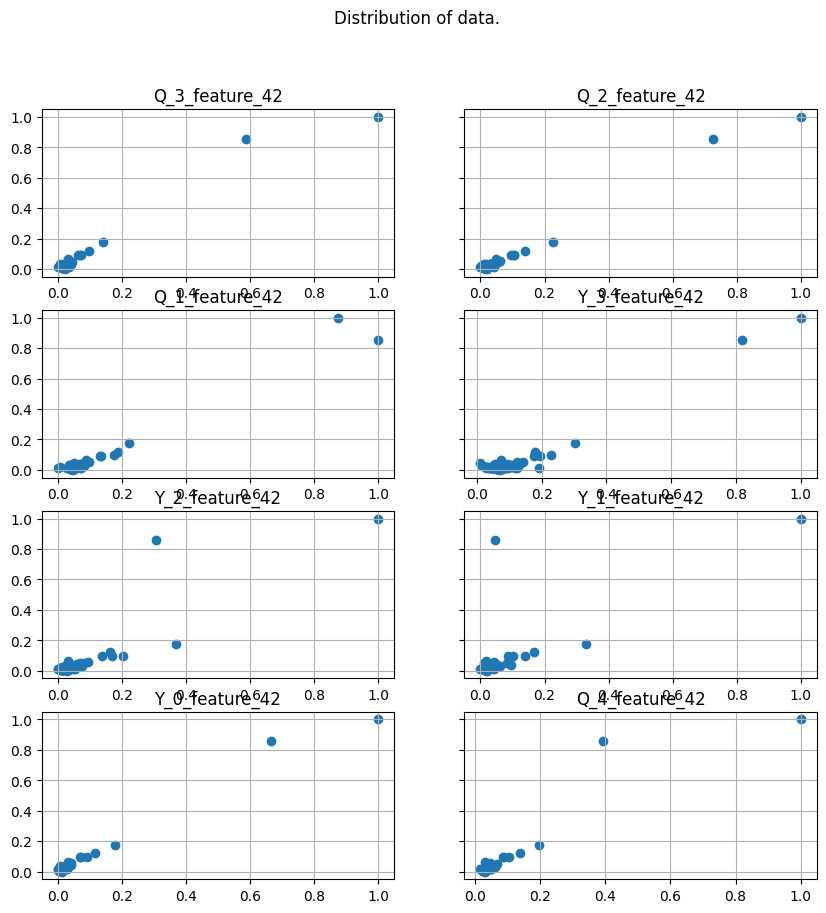

<Figure size 640x480 with 0 Axes>

In [50]:
distplot(4,2,target_42,'target_42')

In [51]:
X_42 = target_42.drop('target_42',axis=1)
Y_42 = target_42['target_42']

xtrain_42,xtest_42,ytrain_42,ytest_42 = train_test_split(X_42,Y_42,test_size=0.25,random_state=16)

In [53]:
from sklearn.ensemble import RandomForestRegressor

pls_reg_42 = PLSRegression(n_components=4)
rdclf_42 = RandomForestRegressor(max_depth = 15, min_samples_split=3,n_estimators=200)

stack_42 = StackingRegressor([
    ('pls',pls_reg_42),
    ('rfr',rdclf_42)
])
stack_42.fit(xtrain_42,ytrain_42)

StackingRegressor(estimators=[('pls', PLSRegression(n_components=4)),
                              ('rfr',
                               RandomForestRegressor(max_depth=15,
                                                     min_samples_split=3,
                                                     n_estimators=200))])

In [54]:
y42_pred_train = stack_42.predict(xtrain_42)
y42_pred_test = stack_42.predict(xtest_42)

print(f"r2 score for train set is {r2_score(ytrain_42,y42_pred_train)} and {r2_score(ytest_42,y42_pred_test)} for test set")
print(f"MSE score for train set is {mean_squared_error(ytrain_42,y42_pred_train)} and {mean_squared_error(ytest_42,y42_pred_test)} for test set")

r2 score for train set is 0.9961217156398577 and 0.949489101747437 for test set
MSE score for train set is 2.722364113421348e-07 and 7.487535126771608e-06 for test set


In [55]:
stack_42_final = StackingRegressor([
    ('pls',pls_reg_42),
    ('rfr',rdclf_42)
])
stack_42_final.fit(X_42,Y_42)

StackingRegressor(estimators=[('pls', PLSRegression(n_components=4)),
                              ('rfr',
                               RandomForestRegressor(max_depth=15,
                                                     min_samples_split=3,
                                                     n_estimators=200))])

In [56]:
test_42 = test_submission(X_42,stack_42_final)

## Target 9

In [57]:
target_9 = dataset_dict['target_9']
target_9.head()

,target_9,Q_4_feature_9,Q_3_feature_9,Q_2_feature_9,Q_1_feature_9,Y_3_feature_9,Y_2_feature_9,Y_1_feature_9,Y_0_feature_9
0,0.001259,0.002800,0.002072,0.021086,0.077401,0.014588,0.002397,0.002318,0.001029
1,0.001263,0.002786,0.002074,0.021092,0.077414,0.014768,0.002460,0.002319,0.001031
2,0.001170,0.002735,0.002004,0.020998,0.077321,0.014463,0.002280,0.002247,0.000954
3,0.001159,0.002715,0.001984,0.020987,0.077307,0.014406,0.002233,0.002227,0.000938
4,0.001149,0.002709,0.001980,0.020976,0.077298,0.014393,0.002222,0.002214,0.000928


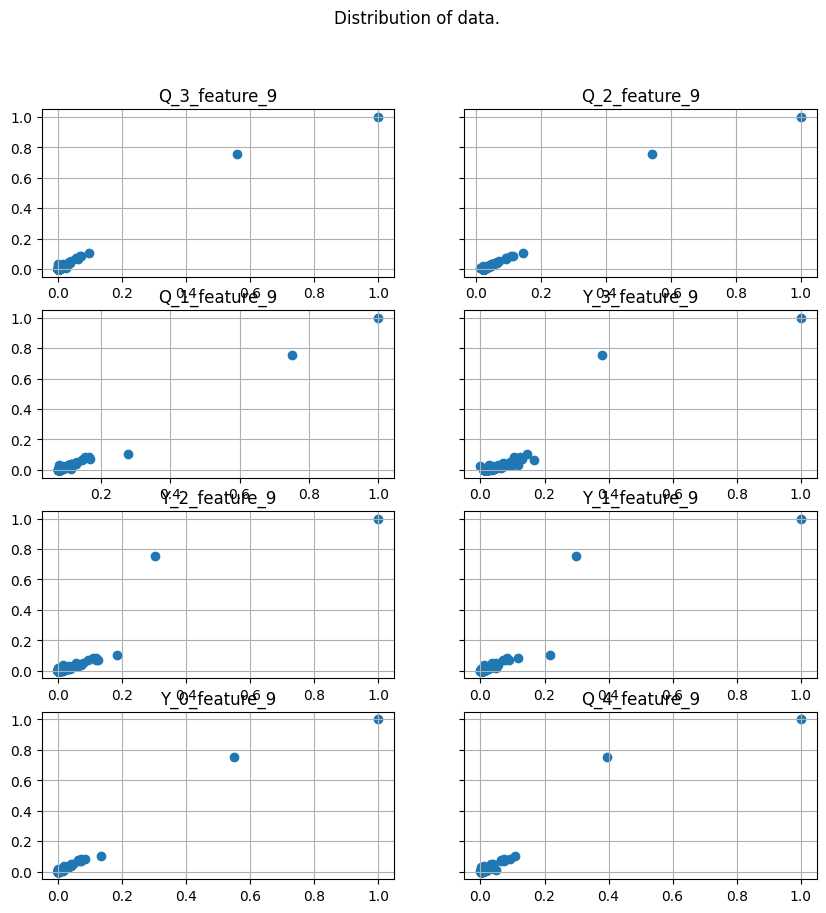

<Figure size 640x480 with 0 Axes>

In [58]:
distplot(4,2,target_9,'target_9')

In [59]:
X_9 = target_9.drop('target_9',axis=1)
Y_9 = target_9['target_9']

xtrain_9,xtest_9,ytrain_9,ytest_9 = train_test_split(X_9,Y_9,test_size=0.25,random_state=17)

In [60]:
pls_reg_9 = PLSRegression(n_components = 4)
rdclf_9 = RandomForestRegressor(max_depth=15,min_samples_split=3,n_estimators=200)

stack_9 = StackingRegressor([
    ('pls',pls_reg_9),
    ('rfr',rdclf_9)
])
stack_9.fit(xtrain_9,ytrain_9)

y9_pred_train = stack_9.predict(xtrain_9)
y9_pred_test = stack_9.predict(xtest_9)

print(f"r2 score for train set is {r2_score(ytrain_9,y9_pred_train)} and {r2_score(ytest_9,y9_pred_test)} for test set.")
print(f"MSE score for train set is {mean_squared_error(ytrain_9,y9_pred_train)} and {mean_squared_error(ytest_9,y9_pred_test)} for test set.")

r2 score for train set is 0.9981544229068873 and 0.9543511659036291 for test set.
MSE score for train set is 2.0171720899655493e-07 and 2.0333387011237217e-07 for test set.


In [61]:
pls_reg_9 = PLSRegression(n_components = 4)
rdclf_9 = RandomForestRegressor(max_depth=15,min_samples_split=3,n_estimators=200)

stack_9_final = StackingRegressor([
    ('pls',pls_reg_9),
    ('rfr',rdclf_9)
])

stack_9_final.fit(X_9,Y_9)

StackingRegressor(estimators=[('pls', PLSRegression(n_components=4)),
                              ('rfr',
                               RandomForestRegressor(max_depth=15,
                                                     min_samples_split=3,
                                                     n_estimators=200))])

In [63]:
test_9 = test_submission(X_9,stack_9_final)

## target 27

In [64]:
target_27 = dataset_dict['target_27']
target_27.head()

,target_27,Q_4_feature_27,Q_4_feature_127,Q_3_feature_27,Q_3_feature_127,Q_2_feature_27,Q_2_feature_127,Q_1_feature_27,Q_1_feature_127,Y_3_feature_27,Y_3_feature_127,Y_2_feature_27,Y_2_feature_127,Y_1_feature_27,Y_1_feature_127,Y_0_feature_27,Y_0_feature_127
0,0.014730,0.018108,0.000023,0.024718,0.000032,0.007838,1.682840e-05,0.039193,0.000018,0.006461,0.000034,0.007153,0.000086,0.005355,2.455713e-05,0.002966,0.000018
1,0.014800,0.018139,0.000001,0.024754,0.000001,0.007887,2.807310e-07,0.039226,0.000003,0.006659,0.000028,0.007389,0.000071,0.005401,7.825906e-07,0.003004,0.000003
2,0.014672,0.018051,0.000001,0.024647,0.000001,0.007783,2.807310e-07,0.039136,0.000008,0.006385,0.000030,0.007045,0.000076,0.005268,7.157396e-06,0.002911,0.000008
3,0.014678,0.018056,0.000001,0.024655,0.000001,0.007789,2.807310e-07,0.039142,0.000003,0.006404,0.000029,0.007053,0.000077,0.005273,7.825906e-07,0.002912,0.000003
4,0.014631,0.018051,0.000001,0.024647,0.000001,0.007783,2.807310e-07,0.039136,0.000003,0.006380,0.000033,0.007041,0.000083,0.005267,7.825906e-07,0.002905,0.000003


In [65]:
col_lst = []
for col in target_27.columns:
    if col.endswith('_27'):
        col_lst.append(col)

filtered_27 = target_27[col_lst]
filtered_27.head()

,target_27,Q_4_feature_27,Q_3_feature_27,Q_2_feature_27,Q_1_feature_27,Y_3_feature_27,Y_2_feature_27,Y_1_feature_27,Y_0_feature_27
0,0.014730,0.018108,0.024718,0.007838,0.039193,0.006461,0.007153,0.005355,0.002966
1,0.014800,0.018139,0.024754,0.007887,0.039226,0.006659,0.007389,0.005401,0.003004
2,0.014672,0.018051,0.024647,0.007783,0.039136,0.006385,0.007045,0.005268,0.002911
3,0.014678,0.018056,0.024655,0.007789,0.039142,0.006404,0.007053,0.005273,0.002912
4,0.014631,0.018051,0.024647,0.007783,0.039136,0.006380,0.007041,0.005267,0.002905


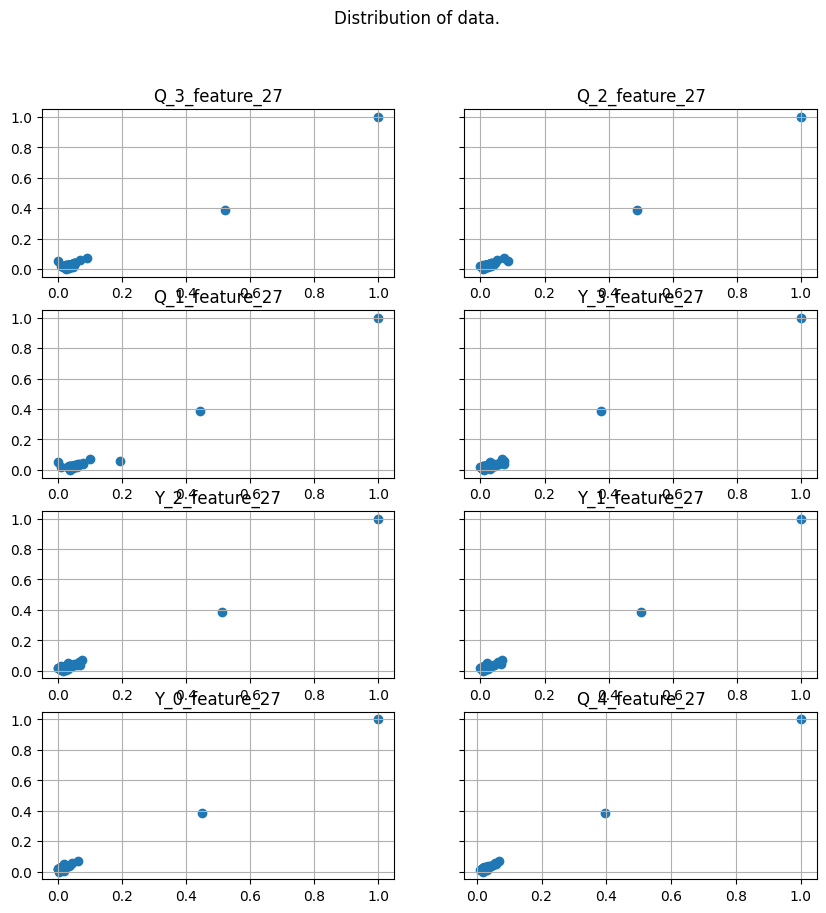

<Figure size 640x480 with 0 Axes>

In [66]:
distplot(4,2,filtered_27,'target_27')

In [67]:
X_27 = filtered_27.drop('target_27',axis=1)
Y_27 = filtered_27['target_27']

xtrain_27,xtest_27,ytrain_27,ytest_27 = train_test_split(X_27,Y_27,test_size=0.25,random_state=16)

In [68]:
pls_reg_27 = PLSRegression(n_components=4)
pls_reg_27.fit(xtrain_27,ytrain_27)

y27_pred_train = pls_reg_27.predict(xtrain_27)
y27_pred_test = pls_reg_27.predict(xtest_27)

print(f"r2 score on train set {r2_score(ytrain_27,y27_pred_train)} and on test set {r2_score(ytest_27,y27_pred_test)}")
print(f"MSE score on train set {mean_squared_error(ytrain_27,y27_pred_train)} and test set is {mean_squared_error(ytest_27,y27_pred_test)}.")

r2 score on train set 0.9925738834449795 and on test set 0.9838730716603636
MSE score on train set 7.732829579948593e-08 and test set is 3.1796543091796506e-06.


In [69]:
pls_27 = PLSRegression(n_components=4)
pls_27.fit(X_27,Y_27)

PLSRegression(n_components=4)

In [70]:
test_27 = test_submission(X_27,pls_27)

## target 99

In [71]:
target_99 = dataset_dict['target_99']
target_99.head()

,target_99,Q_4_feature_99,Q_3_feature_99,Q_2_feature_99,Q_1_feature_99,Y_3_feature_99,Y_2_feature_99,Y_1_feature_99,Y_0_feature_99
0,0.000000,0.000000,0.000000,0.000000,7.441564e-10,0.000000,0.000000,4.128507e-08,7.441564e-10
1,0.000168,0.000208,0.000206,0.000196,2.001777e-04,0.000557,0.000316,2.553227e-04,2.001777e-04
2,0.000019,0.000019,0.000020,0.000020,2.164201e-05,0.000023,0.000023,2.006929e-05,2.164201e-05
3,0.000009,0.000009,0.000000,0.000009,7.441564e-10,0.000015,0.000013,9.753318e-06,1.024744e-05
4,0.000000,0.000000,0.000000,0.000000,7.441564e-10,0.000000,0.000000,4.128507e-08,7.441564e-10


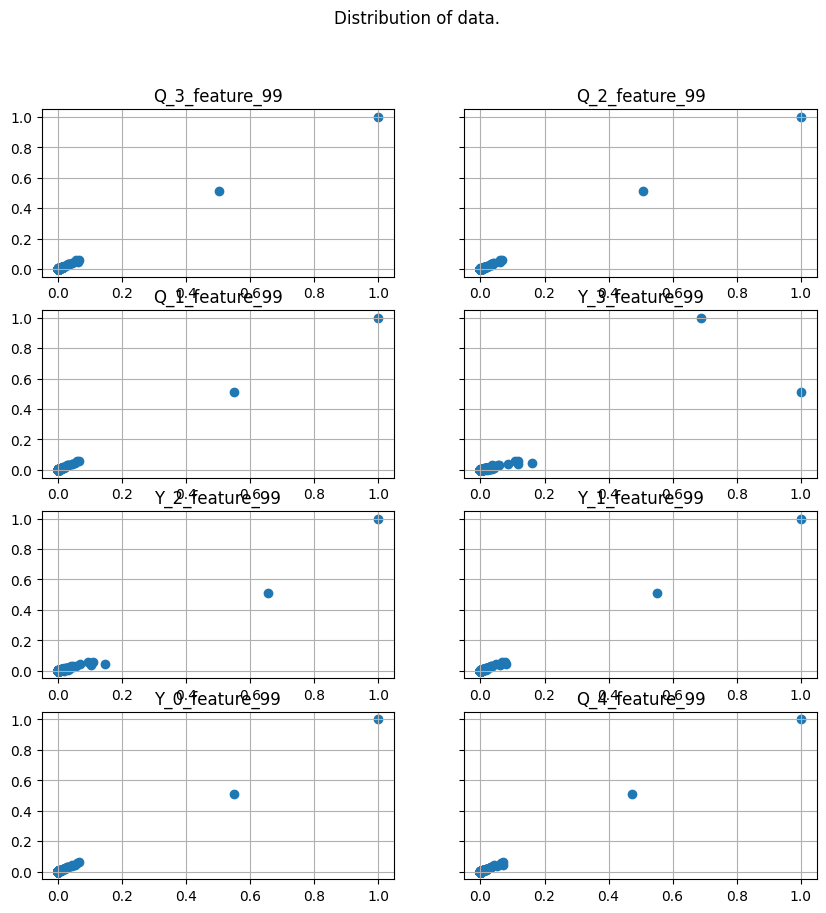

<Figure size 640x480 with 0 Axes>

In [72]:
distplot(4,2,target_99,'target_99')

In [73]:
X_99 = target_99.drop(['target_99'],axis=1)
Y_99 = target_99['target_99']

xtrain_99,xtest_99,ytrain_99,ytest_99 = train_test_split(X_99,Y_99,test_size=0.25,random_state=18)

In [74]:
pls_reg_99 = PLSRegression(n_components=4)
pls_reg_99.fit(xtrain_99,ytrain_99)

y99_pred_train = pls_reg_99.predict(xtrain_99)
y99_pred_test = pls_reg_99.predict(xtest_99)

print(f"r2 score on train set is {r2_score(ytrain_99,y99_pred_train)} and on test set is {r2_score(ytest_99,y99_pred_test)}.")
print(f"MSE score on train set is {mean_squared_error(ytrain_99,y99_pred_train)} and test set is {mean_squared_error(ytest_99,y99_pred_test)}.")

r2 score on train set is 0.9955578957383212 and on test set is 0.9985698941184863.
MSE score on train set is 5.050926691760282e-09 and test set is 3.6819171284320307e-07.


In [75]:
pls_99 = PLSRegression(n_components=4)
pls_99.fit(X_99,Y_99)

PLSRegression(n_components=4)

In [76]:
test_99 = test_submission(X_99,pls_99)

## target 105

In [77]:
target_105 = dataset_dict['target_105']
target_105.head()

,target_105,Q_4_feature_105,Q_3_feature_105,Q_2_feature_105,Q_1_feature_105,Y_3_feature_105,Y_2_feature_105,Y_1_feature_105,Y_0_feature_105
0,9.820878e-05,0.000092,9.627084e-05,0.000096,0.000099,5.698404e-05,9.949517e-05,0.000087,9.860810e-05
1,1.199782e-04,0.000118,1.224386e-04,0.000117,0.000118,8.242101e-05,1.580137e-04,0.000127,1.177523e-04
2,2.562244e-06,0.000003,3.016845e-06,0.000003,0.000003,2.214762e-06,1.819966e-06,0.000003,2.790319e-06
3,9.158264e-07,0.000001,1.248056e-09,0.000001,0.000000,2.803918e-06,9.065383e-07,0.000001,9.207780e-07
4,4.332068e-06,0.000004,4.552404e-06,0.000004,0.000004,2.744438e-09,3.365876e-06,0.000004,4.460337e-06


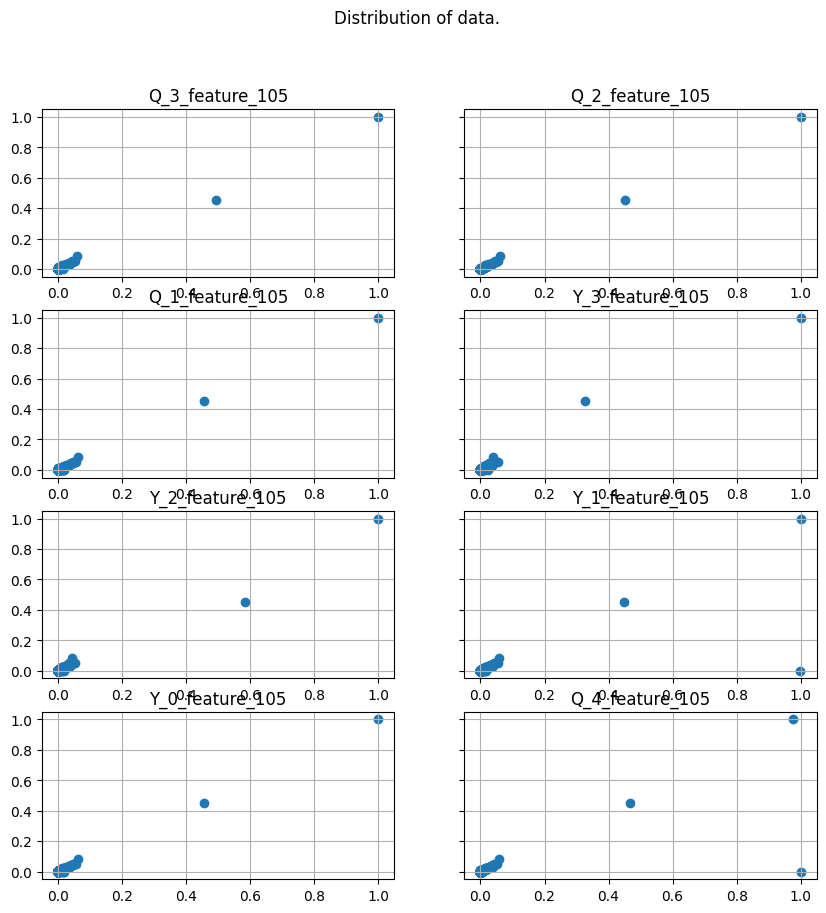

<Figure size 640x480 with 0 Axes>

In [78]:
distplot(4,2,target_105,'target_105')

In [79]:
X_105 = target_105.drop(['target_105'],axis=1)
Y_105 = target_105['target_105']

xtrain_105,xtest_105,ytrain_105,ytest_105 = train_test_split(X_105,Y_105,test_size=0.25,random_state=18)

In [80]:
pls_reg_105 = PLSRegression(n_components=4)
pls_reg_105.fit(xtrain_105,ytrain_105)

y105_pred_train = pls_reg_105.predict(xtrain_105)
y105_pred_test = pls_reg_105.predict(xtest_105)

print(f"r2 score on train set is {r2_score(ytrain_105,y105_pred_train)} and on test set is {r2_score(ytest_105,y105_pred_test)}.")
print(f"MSE score on train set is {mean_squared_error(ytrain_105,y105_pred_train)} and test set is {mean_squared_error(ytest_105,y105_pred_test)}.")

r2 score on train set is 0.9880236012498305 and on test set is 0.9993176772974403.
MSE score on train set is 3.3976556341554917e-08 and test set is 1.693932154378358e-07.


In [81]:
pls_105 = PLSRegression(n_components=4)
pls_105.fit(X_105,Y_105)

PLSRegression(n_components=4)

In [82]:
test_105 = test_submission(X_105,pls_reg_105)

## target 24

In [83]:
target_24 = dataset_dict['target_24']
target_24.head()

,target_24,Q_4_feature_24,Q_4_feature_124,Q_3_feature_24,Q_3_feature_124,Q_2_feature_24,Q_2_feature_124,Q_1_feature_24,Q_1_feature_124,Y_3_feature_24,Y_3_feature_124,Y_2_feature_24,Y_2_feature_124,Y_1_feature_24,Y_1_feature_124,Y_0_feature_24,Y_0_feature_124
0,0.018971,0.031992,0.000083,0.028033,0.000004,0.032354,0.000004,0.052131,0.000005,0.083012,0.000005,0.035178,0.000001,0.137883,7.221450e-05,0.011162,0.000005
1,0.018792,0.031769,0.000070,0.027807,0.000079,0.032233,0.000087,0.052031,0.000121,0.082983,0.000547,0.034975,0.000052,0.137997,6.204830e-05,0.010985,0.000121
2,0.018868,0.031926,0.000024,0.027866,0.000033,0.032282,0.000029,0.052047,0.000039,0.083187,0.000004,0.035100,0.000004,0.137831,8.516338e-06,0.011055,0.000039
3,0.018872,0.031917,0.000014,0.027860,0.000003,0.032287,0.000020,0.052048,0.000004,0.083152,0.000020,0.035060,0.000007,0.137817,9.471825e-06,0.011052,0.000021
4,0.018802,0.031827,0.000004,0.027805,0.000003,0.032200,0.000003,0.051979,0.000006,0.083016,0.000000,0.034909,0.000002,0.137717,6.320953e-07,0.010978,0.000006


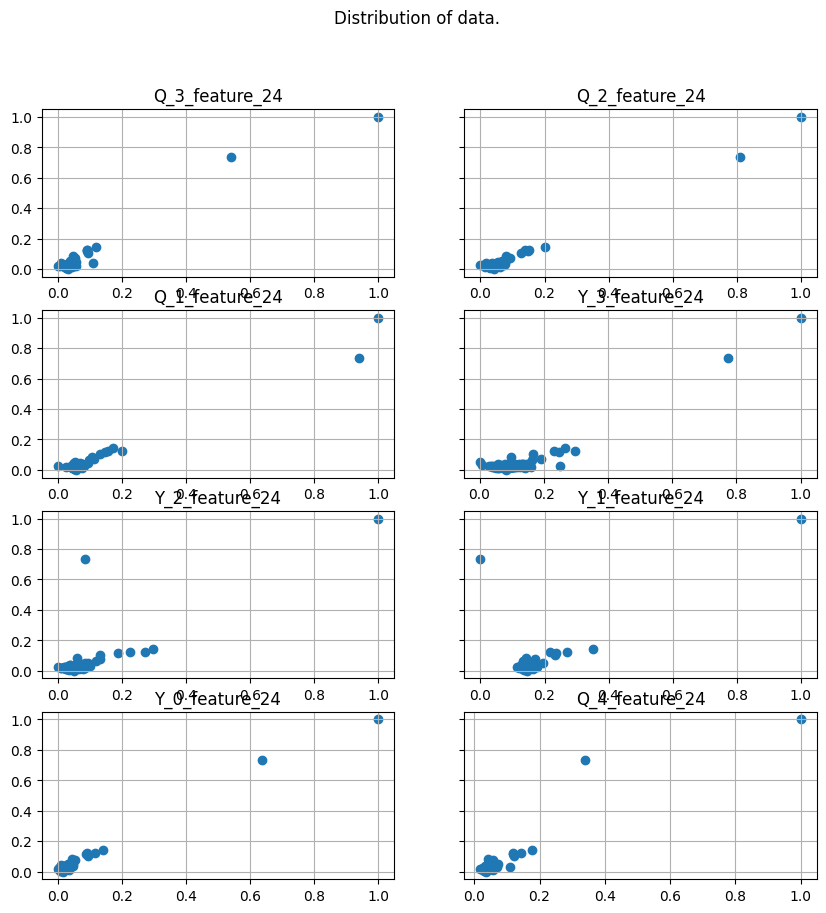

<Figure size 640x480 with 0 Axes>

In [84]:
col_lst = []
for col in target_24.columns:
    if col.endswith('_24'):
        col_lst.append(col)

subset_24 = target_24[col_lst]
distplot(4,2,subset_24,'target_24')

In [85]:
X_24 = subset_24.drop('target_24',axis=1)
Y_24 = subset_24['target_24']

xtrain_24,xtest_24,ytrain_24,ytest_24 = train_test_split(X_24,Y_24,test_size=0.25,random_state=19)

In [86]:
pls_reg_24 = PLSRegression(n_components = 4)
#rdclf_24 = RandomForestRegressor(max_depth=15,n_estimators=200,min_samples_split=3)
lgb_24 = LGBMRegressor(boosting_type='dart',num_leaves=50,max_depth=15,n_estimator=200,learning_rate=0.01)

stack_24 = StackingRegressor([
    ('pls',pls_reg_24),
    ('lgb',lgb_24)
])

stack_24.fit(xtrain_24,ytrain_24)
y24_pred_train = stack_24.predict(xtrain_24)
y24_pred_test = stack_24.predict(xtest_24)

print(f"r2_score for train set is {r2_score(ytrain_24,y24_pred_train)} and test set is {r2_score(ytest_24,y24_pred_test)}.")
print(f"MSE score for train set is {mean_squared_error(ytrain_24,y24_pred_train)} and test is {mean_squared_error(ytest_24,y24_pred_test)}.")

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.379538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 14799, number of used features: 8
[LightGBM] [Info] Start training from score 0.019166
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 11839, number of used features: 8
[LightGBM] [Info] Start training from score 0.019210
[LightGBM] [Warning] Unknown parameter: 

In [87]:
stack_24_final = StackingRegressor([
    ('pls',pls_reg_24),
    ('lgb',lgb_24)
])
stack_24_final.fit(X_24,Y_24)

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 19733, number of used features: 8
[LightGBM] [Info] Start training from score 0.019128
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15786, number of used features: 8
[LightGBM] [Info] Start training from score 0.019141
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator


StackingRegressor(estimators=[('pls', PLSRegression(n_components=4)),
                              ('lgb',
                               LGBMRegressor(boosting_type='dart',
                                             learning_rate=0.01, max_depth=15,
                                             n_estimator=200, num_leaves=50))])

In [88]:
test_24 = test_submission(X_24,stack_24_final)

[LightGBM] [Warning] Unknown parameter: n_estimator


## target 83

In [89]:
target_83 = dataset_dict['target_83']
target_83.head()

,target_83,Q_4_feature_83,Q_3_feature_83,Q_2_feature_83,Q_1_feature_83,Y_3_feature_83,Y_2_feature_83,Y_1_feature_83,Y_0_feature_83
0,0.006354,0.024680,0.010799,0.012848,0.161833,0.110194,0.125879,0.006429,0.006525
1,0.006249,0.024552,0.010729,0.012746,0.161741,0.110156,0.125723,0.006273,0.006425
2,0.006267,0.024632,0.010760,0.012760,0.161742,0.110075,0.125762,0.006371,0.006461
3,0.006271,0.024627,0.010758,0.012760,0.161749,0.110041,0.125730,0.006359,0.006460
4,0.006214,0.024568,0.010714,0.012693,0.161686,0.109951,0.125637,0.006286,0.006401


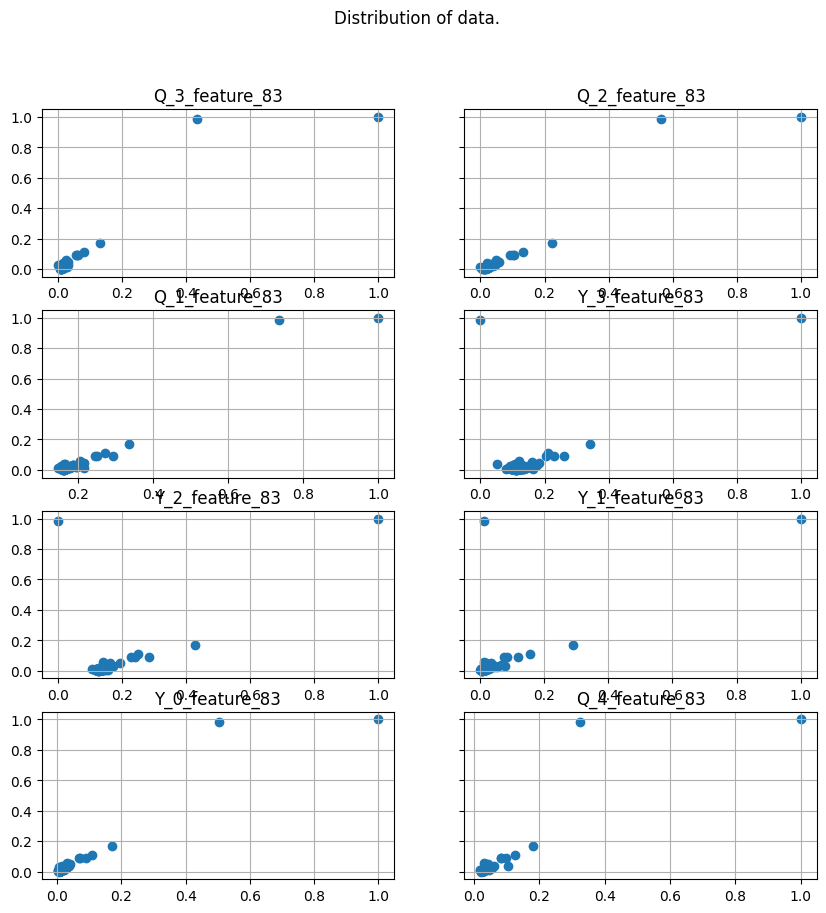

<Figure size 640x480 with 0 Axes>

In [90]:
distplot(4,2,target_83,'target_83')

In [91]:
X_83 = target_83.drop('target_83',axis=1)
Y_83 = target_83['target_83']

xtrain_83,xtest_83,ytrain_83,ytest_83 = train_test_split(X_83,Y_83,test_size=0.25,random_state=20)

In [93]:
pls_reg_83 = PLSRegression(n_components=4)
rdclf_83 = RandomForestRegressor(max_depth=15,min_samples_split=3,n_estimators=200)
lgb_83 = LGBMRegressor(boosting_type='dart',num_leaves=50,max_depth=15,n_estimator=200,learning_rate=0.01)

stack_83 = StackingRegressor([
    ('pls',pls_reg_83),
    ('rdr',rdclf_83)
])
stack_83.fit(xtrain_83,ytrain_83)

y83_pred_train = stack_83.predict(xtrain_83)
y83_pred_test = stack_83.predict(xtest_83)

print(f"r2 score on train set is {r2_score(ytrain_83,y83_pred_train)} and test set is {r2_score(ytest_83,y83_pred_test)}.")
print(f"MSE score on train set is {mean_squared_error(ytrain_83,y83_pred_train)} and test set is {mean_squared_error(ytest_83,y83_pred_test)}.")

r2 score on train set is 0.9081861565816504 and test set is 0.9374340154575175.
MSE score on train set is 1.2425902348334274e-05 and test set is 2.9627570990318176e-07.


In [95]:
pls_reg_83 = PLSRegression(n_components=4)
rdclf_83 = RandomForestRegressor(max_depth=15,min_samples_split=3,n_estimators=200)

stack_83_final = StackingRegressor([
         ('pls',pls_reg_83),
        ('rfr',rdclf_83)
])
stack_83_final.fit(X_83,Y_83)

StackingRegressor(estimators=[('pls', PLSRegression(n_components=4)),
                              ('rfr',
                               RandomForestRegressor(max_depth=15,
                                                     min_samples_split=3,
                                                     n_estimators=200))])

In [96]:
test_83 = test_submission(X_83,stack_83_final)

## target 80

In [97]:
target_80 = dataset_dict['target_80']
target_80.head()

,target_80,Q_4_feature_80,Q_3_feature_80,Q_2_feature_80,Q_1_feature_80,Y_3_feature_80,Y_2_feature_80,Y_1_feature_80,Y_0_feature_80
0,0.000046,0.000034,0.000045,0.000051,6.586222e-05,0.000043,0.000046,0.000055,0.000065
1,0.000181,0.000175,0.000206,0.000210,2.064842e-04,0.000386,0.000268,0.000218,0.000206
2,0.000008,0.000012,0.000012,0.000012,1.218396e-05,0.000013,0.000014,0.000015,0.000012
3,0.000007,0.000006,0.000000,0.000008,6.066685e-07,0.000006,0.000006,0.000007,0.000007
4,0.000006,0.000005,0.000006,0.000005,6.124634e-06,0.000003,0.000006,0.000006,0.000006


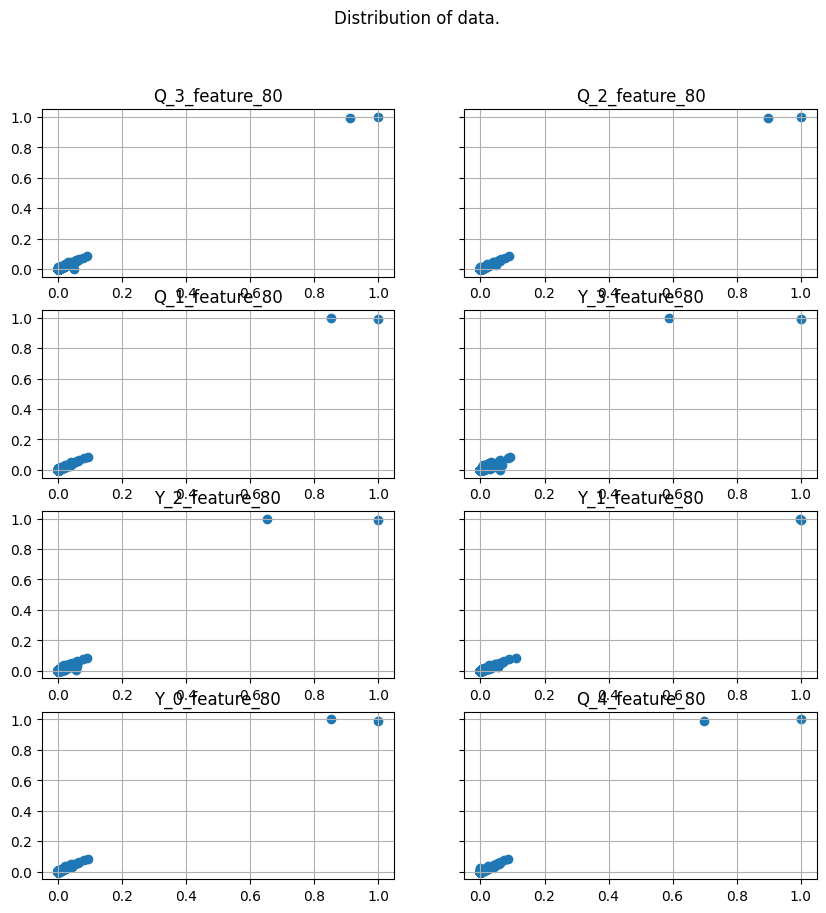

<Figure size 640x480 with 0 Axes>

In [98]:
distplot(4,2,target_80,'target_80')

In [99]:
X_80 = target_80.drop(['target_80'],axis=1)
Y_80 = target_80['target_80']

xtrain_80,xtest_80,ytrain_80,ytest_80 = train_test_split(X_80,Y_80,test_size=0.25,random_state=21)

In [100]:
pls_reg_80 = PLSRegression(n_components=4)
pls_reg_80.fit(xtrain_80,ytrain_80)

y80_pred_train = pls_reg_80.predict(xtrain_80)
y80_pred_test = pls_reg_80.predict(xtest_80)

print(f"r2 score on train set is {r2_score(ytrain_80,y80_pred_train)} and test set is {r2_score(ytest_80,y80_pred_test)}.")
print(f"MSE score on train set is {mean_squared_error(ytest_80,y80_pred_test)} and test set is {mean_squared_error(ytest_80,y80_pred_test)}.")

r2 score on train set is 0.9989953322772627 and test set is 0.9928530408673573.
MSE score on train set is 1.4713479578123688e-06 and test set is 1.4713479578123688e-06.


In [101]:
pls_80 = PLSRegression(n_components=4)
pls_80.fit(X_80,Y_80)

PLSRegression(n_components=4)

In [102]:
test_80 = test_submission(X_80,pls_80)

## target 52

In [103]:
target_52 = dataset_dict['target_52']
target_52.head()

,target_52,Q_4_feature_52,Q_3_feature_52,Q_2_feature_52,Q_1_feature_52,Y_3_feature_52,Y_2_feature_52,Y_1_feature_52,Y_0_feature_52
0,0.014500,0.028277,0.019793,0.018151,0.054956,0.074989,0.018054,0.135205,0.008170
1,0.014357,0.028121,0.019619,0.018044,0.054796,0.074986,0.017847,0.135041,0.008016
2,0.014409,0.028232,0.019668,0.018079,0.054853,0.075120,0.017991,0.135180,0.008080
3,0.014411,0.028225,0.019663,0.018082,0.054852,0.075086,0.017954,0.135167,0.008077
4,0.014362,0.028167,0.019623,0.018020,0.054786,0.074991,0.017839,0.135094,0.008022


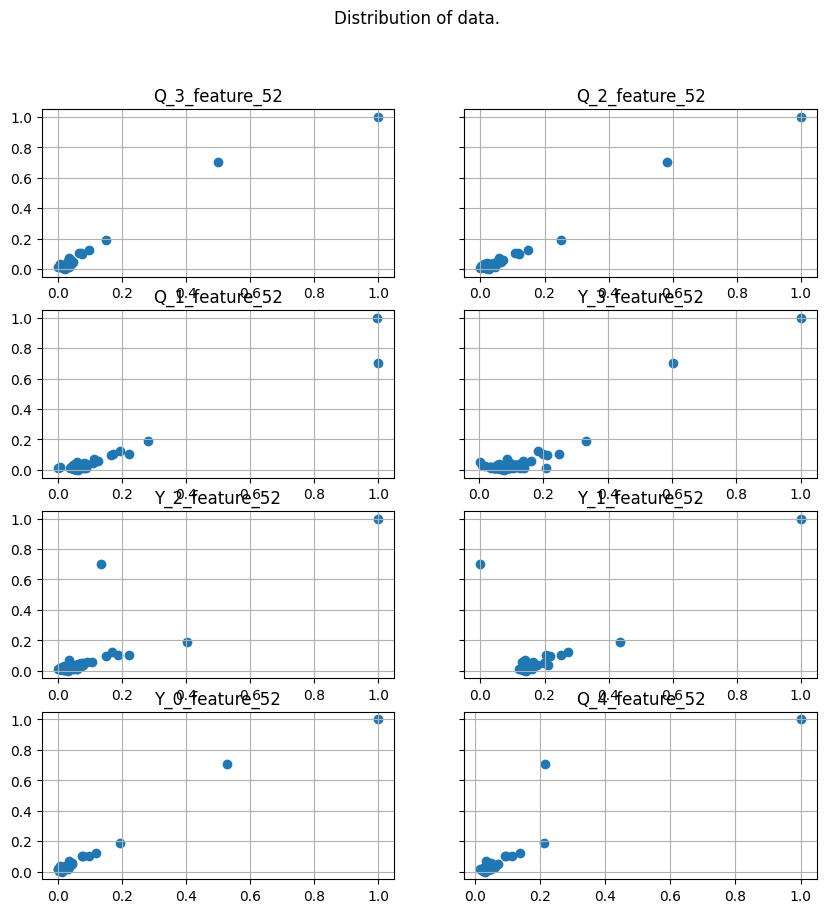

<Figure size 640x480 with 0 Axes>

In [104]:
distplot(4,2,target_52,'target_52')

In [105]:
X_52 = target_52.drop('target_52',axis=1)
Y_52 = target_52['target_52']

xtrain_52,xtest_52,ytrain_52,ytest_52 = train_test_split(X_52,Y_52,test_size=0.25,random_state=13)

In [109]:
poly = PolynomialFeatures(degree=2)
xpoly_train = poly.fit_transform(xtrain_52)
xpoly_test = poly.transform(xtest_52)

pls_poly_52 = PLSRegression(n_components=4)
pls_poly_52.fit(xpoly_train,ytrain_52)

ypoly_train = pls_poly_52.predict(xpoly_train)
ypoly_test = pls_poly_52.predict(xpoly_test)

print(f"r2 score on {r2_score(ytrain_52,ypoly_train)} and test set is {r2_score(ytest_52,ypoly_test)}.")
print(f"MSE score on {mean_squared_error(ytrain_52,ypoly_train)} and test set is {mean_squared_error(ytest_52,ypoly_test)}.")



r2 score on 0.9973681967617662 and test set is 0.9270070082905438.
MSE score on 2.6989840593535925e-07 and test set is 2.7559014782725e-07.


In [106]:
pls_reg_52 = PLSRegression(n_components=4)
pls_reg_52.fit(xtrain_52,ytrain_52)

y52_pred_train = pls_reg_52.predict(xtrain_52)
y52_pred_test = pls_reg_52.predict(xtest_52)

print(f"r2 score on {r2_score(ytrain_52,y52_pred_train)} and test set is {r2_score(ytest_52,y52_pred_test)}.")
print(f"MSE score on {mean_squared_error(ytrain_52,y52_pred_train)} and test set is {mean_squared_error(ytest_52,y52_pred_test)}.")

r2 score on 0.9971893193948994 and test set is 0.9215831817707848.
MSE score on 2.882427545834311e-07 and test set is 2.9606818438067043e-07.


In [86]:
from sklearn.ensemble import RandomForestRegressor

rdclf = RandomForestRegressor(max_depth=17,n_estimators=200,min_samples_split=3,random_state=14)
rdclf.fit(xtrain_52,ytrain_52)

y52_rdclf_train = rdclf.predict(xtrain_52)
y52_rdclf_test = rdclf.predict(xtest_52)

print(f"r2 score on train set {r2_score(ytrain_52,y52_rdclf_train)} and test set {r2_score(ytest_52,y52_rdclf_test)}")
print(f"MSE score on train set {mean_squared_error(ytrain_52,y52_rdclf_train)} and test set {mean_squared_error(ytest_52,y52_rdclf_test)}")

r2 score on train set 0.9258181508917427 and test set 0.9374910731598205
MSE score on train set 7.607545477865221e-06 and test set 2.360068272989568e-07


In [87]:
from sklearn.ensemble import StackingRegressor

estimators  = [
    ('pls_reg',PLSRegression(n_components=4)),
    ('rdclf',RandomForestRegressor(max_depth=17,min_samples_split=3,n_estimators=200))
]

stacking_52 = StackingRegressor(estimators = estimators)
stacking_52.fit(xtrain_52,ytrain_52)

y52_stack_train = stacking_52.predict(xtrain_52)
y52_stack_test = stacking_52.predict(xtest_52)

print(f"r2 score on train {r2_score(ytrain_52,y52_stack_train)} and test set {r2_score(ytest_52,y52_stack_test)}")
print(f"MSE score on train {mean_squared_error(ytrain_52,y52_stack_train)} and test set {mean_squared_error(ytest_52,y52_stack_test)}")


r2 score on train 0.9971583286331122 and test set 0.9164767844521149
MSE score on train 2.914209394429895e-07 and test set 3.153477447735155e-07


In [108]:
estimators  = [
    ('pls_reg',PLSRegression(n_components=4)),
    ('lgb',LGBMRegressor(max_depth=17,num_leaves=50,learning_rate=0.01,n_estimators=200))
]
stack_52 = StackingRegressor(estimators=estimators)
stack_52.fit(xtrain_52,ytrain_52)
y52_stack_train = stack_52.predict(xtrain_52)
y52_stack_test = stack_52.predict(xtest_52)

print(f"r2 score on train {r2_score(ytrain_52,y52_stack_train)} and test set {r2_score(ytest_52,y52_stack_test)}")
print(f"MSE score on train {mean_squared_error(ytrain_52,y52_stack_train)} and test set {mean_squared_error(ytest_52,y52_stack_test)}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 14799, number of used features: 8
[LightGBM] [Info] Start training from score 0.014691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 11839, number of used features: 8
[LightGBM] [Info] Start training from score 0.014730
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 11839, number of used features: 8
[LightGBM] [Info] Start traini

In [110]:
X_poly = poly.fit_transform(X_52)

pls_poly_final = PLSRegression(n_components=4)
pls_poly_final.fit(X_52,Y_52)

test_52 = test_submission(X_52,pls_poly_final)

## target 69

In [111]:
target_69 = dataset_dict['target_69']
target_69.head()

,target_69,Q_4_feature_69,Q_3_feature_69,Q_2_feature_69,Q_1_feature_69,Y_3_feature_69,Y_2_feature_69,Y_1_feature_69,Y_0_feature_69
0,0.001155,0.001139,0.001136,0.001178,0.001202,0.001345,0.001122,0.001168,0.001202
1,0.001141,0.001135,0.001120,0.001162,0.001189,0.001362,0.001137,0.001166,0.001189
2,0.001131,0.001121,0.001107,0.001150,0.001178,0.001330,0.001107,0.001150,0.001178
3,0.001130,0.001119,0.001103,0.001148,0.001174,0.001327,0.001105,0.001148,0.001176
4,0.001142,0.001133,0.001119,0.001162,0.001189,0.001352,0.001125,0.001163,0.001189


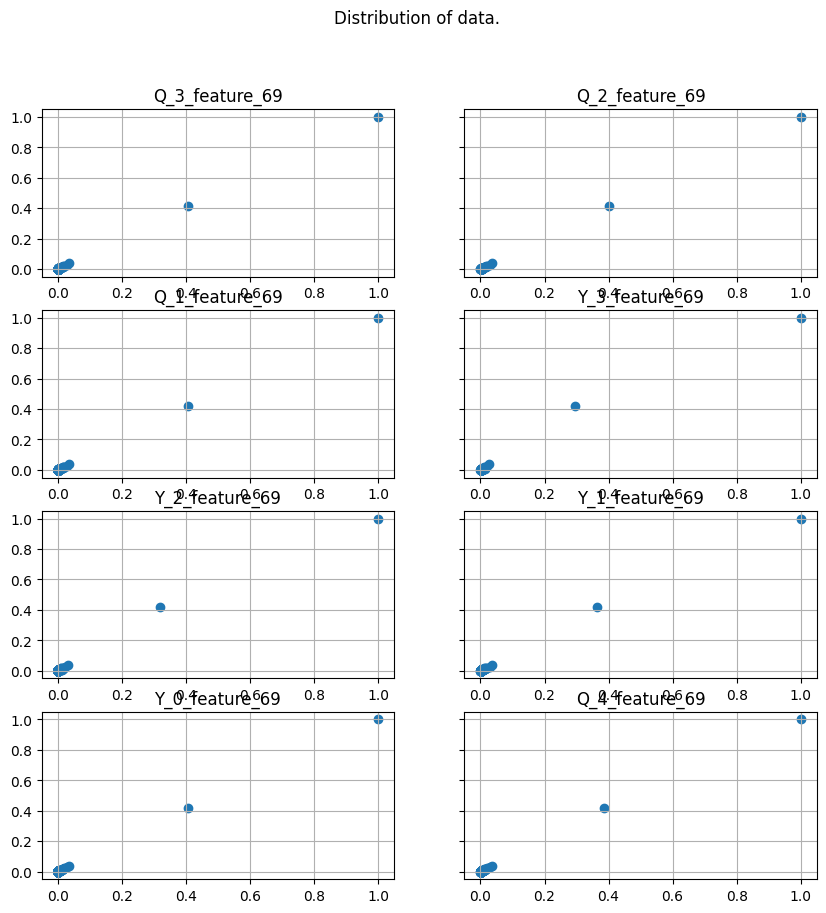

<Figure size 640x480 with 0 Axes>

In [112]:
distplot(4,2,target_69,'target_69')

In [113]:
X_69 = target_69.drop('target_69',axis=1)
Y_69 = target_69['target_69']

xtrain_69,xtest_69,ytrain_69,ytest_69 = train_test_split(X_69,Y_69,test_size=0.25,random_state=15)

In [114]:
pls_reg_69 = PLSRegression(n_components=4)
pls_reg_69.fit(xtrain_69,ytrain_69)

y69_pred_train = pls_reg_69.predict(xtrain_69)
y69_pred_test = pls_reg_69.predict(xtest_69)

print(f"r2 score on train set {r2_score(ytrain_69,y69_pred_train)} and test set is  {r2_score(ytest_69,y69_pred_test)}.")
print(f"MSE score on train set {mean_squared_error(ytrain_69,y69_pred_train)} and test set is {mean_squared_error(ytest_69,y69_pred_test)}.")

r2 score on train set 0.9999643647999126 and test set is  0.9972947158596581.
MSE score on train set 2.830736066701042e-09 and test set is 4.923230861393168e-10.


In [115]:
pls_69 = PLSRegression(n_components=4)
pls_69.fit(X_69,Y_69)

PLSRegression(n_components=4)

In [116]:
test_69 = test_submission(X_69,pls_69)

## target 88

In [117]:
target_88 = dataset_dict['target_88']
target_88.head()

,target_88,Q_4_feature_88,Q_3_feature_88,Q_2_feature_88,Q_1_feature_88,Y_3_feature_88,Y_2_feature_88,Y_1_feature_88,Y_0_feature_88
0,0.000041,0.000050,0.000045,0.000044,0.000044,0.000043,0.000050,0.000050,0.000044
1,0.000043,0.000048,0.000049,0.000046,0.000046,0.000082,0.000089,0.000051,0.000046
2,0.000005,0.000006,0.000006,0.000005,0.000006,0.000004,0.000005,0.000005,0.000006
3,0.000003,0.000003,0.000000,0.000003,0.000000,0.000002,0.000003,0.000003,0.000003
4,0.000011,0.000012,0.000012,0.000012,0.000012,0.000018,0.000016,0.000013,0.000012


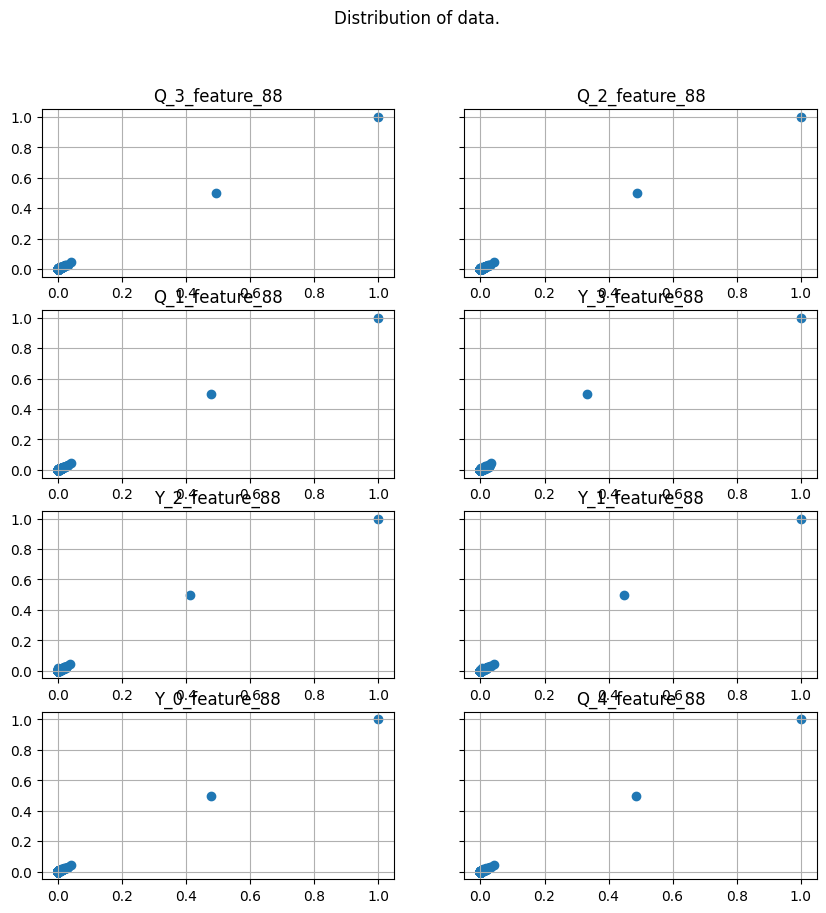

<Figure size 640x480 with 0 Axes>

In [118]:
distplot(4,2,target_88,'target_88')

In [119]:
X_88 = target_88.drop('target_88',axis=1)
Y_88 = target_88['target_88']

xtrain_88,xtest_88,ytrain_88,ytest_88 = train_test_split(X_88,Y_88,test_size=0.25,random_state=21)

In [120]:
pls_reg_88 = PLSRegression(n_components=4)
pls_reg_88.fit(xtrain_88,ytrain_88)

y88_pred_train = pls_reg_88.predict(xtrain_88)
y88_pred_test = pls_reg_88.predict(xtest_88)

print(f"r2 score on train set {r2_score(ytrain_88,y88_pred_train)} and test set is {r2_score(ytest_88,y88_pred_test)}")
print(f"MSE score on train set {mean_squared_error(ytrain_88,y88_pred_train)} and test set {mean_squared_error(ytest_88,y88_pred_test)}")



r2 score on train set 0.9999374292694668 and test set is 0.9987426332386882
MSE score on train set 4.275774473575732e-09 and test set 6.402051212710949e-08


In [121]:
pls_88 = PLSRegression(n_components=4)
pls_88.fit(X_88,Y_88)

PLSRegression(n_components=4)

In [122]:
test_88 = test_submission(X_88,pls_88)

## target 85

In [123]:
target_85 = dataset_dict['target_85']
target_85.head()

,target_85,Q_4_feature_85,Q_3_feature_85,Q_2_feature_85,Q_1_feature_85,Y_3_feature_85,Y_2_feature_85,Y_1_feature_85,Y_0_feature_85
0,0.000079,0.000091,0.000077,0.000078,0.000082,0.000048,0.000081,0.000084,0.000082
1,0.000114,0.000110,0.000113,0.000111,0.000118,0.000159,0.000138,0.000113,0.000118
2,0.000008,0.000007,0.000008,0.000008,0.000008,0.000003,0.000002,0.000004,0.000008
3,0.000003,0.000003,0.000000,0.000004,0.000000,0.000006,0.000002,0.000003,0.000003
4,0.000004,0.000004,0.000004,0.000004,0.000004,0.000000,0.000003,0.000004,0.000004


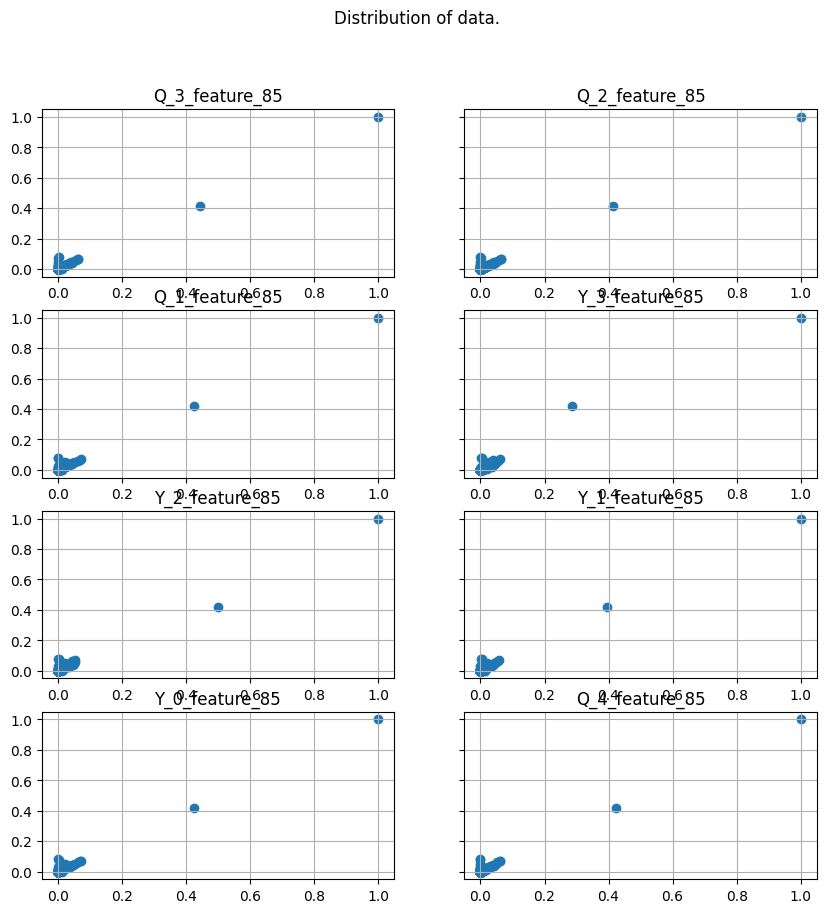

<Figure size 640x480 with 0 Axes>

In [124]:
distplot(4,2,target_85,'target_85')

In [124]:
X_85 = target_85.drop('target_85',axis=1)
Y_85 = target_85['target_85']

xtrain_85,xtest_85,ytrain_85,ytest_85 = train_test_split(X_85,Y_85,test_size=0.25,random_state=22)

In [125]:
pls_reg_85 = PLSRegression(n_components=4)
pls_reg_85.fit(xtrain_85,ytrain_85)

y85_pred_train = pls_reg_85.predict(xtrain_85)
y85_pred_test = pls_reg_85.predict(xtest_85)

print(f"r2 score on train set {r2_score(ytrain_85,y85_pred_train)} and test set is {r2_score(ytest_85,y85_pred_test)}")
print(f"MSE score on train set {mean_squared_error(ytest_85,y85_pred_test)} and test set is {mean_squared_error(ytest_85,y85_pred_test)}")

r2 score on train set 0.9887078532366244 and test set is 0.9780427216108415
MSE score on train set 1.0031904592376972e-07 and test set is 1.0031904592376972e-07


In [126]:
pls_85 = PLSRegression(n_components=4)
pls_85.fit(X_85,Y_85)

PLSRegression(n_components=4)

In [127]:
test_85 = test_submission(X_85,pls_85)

## target 134

In [128]:
target_134 = dataset_dict['target_134']
target_134.head()

,target_134,Q_4_feature_134,Q_4_feature_34,Q_3_feature_134,Q_3_feature_34,Q_2_feature_134,Q_2_feature_34,Q_1_feature_134,Q_1_feature_34,Y_3_feature_134,Y_3_feature_34,Y_2_feature_134,Y_2_feature_34,Y_1_feature_134,Y_1_feature_34,Y_0_feature_134,Y_0_feature_34
0,0.000465,0.000491,0.000051,0.001091,0.000031,0.007178,0.000032,0.001976,0.000033,0.000066,0.000028,0.000460,0.000056,0.000311,0.000052,0.000109,0.000033
1,0.000571,0.000595,0.000107,0.001189,0.000102,0.007292,0.000092,0.002088,0.000089,0.000346,0.000213,0.000710,0.000281,0.000458,0.000121,0.000215,0.000089
2,0.000436,0.000471,0.000014,0.001072,0.000013,0.007151,0.000011,0.001950,0.000011,0.000042,0.000012,0.000432,0.000014,0.000292,0.000013,0.000087,0.000011
3,0.000429,0.000461,0.000005,0.001062,0.000000,0.007144,0.000005,0.001940,0.000000,0.000024,0.000006,0.000415,0.000006,0.000281,0.000006,0.000077,0.000005
4,0.000425,0.000457,0.000041,0.001058,0.000031,0.007139,0.000031,0.001937,0.000030,0.000018,0.000071,0.000407,0.000055,0.000276,0.000044,0.000073,0.000030


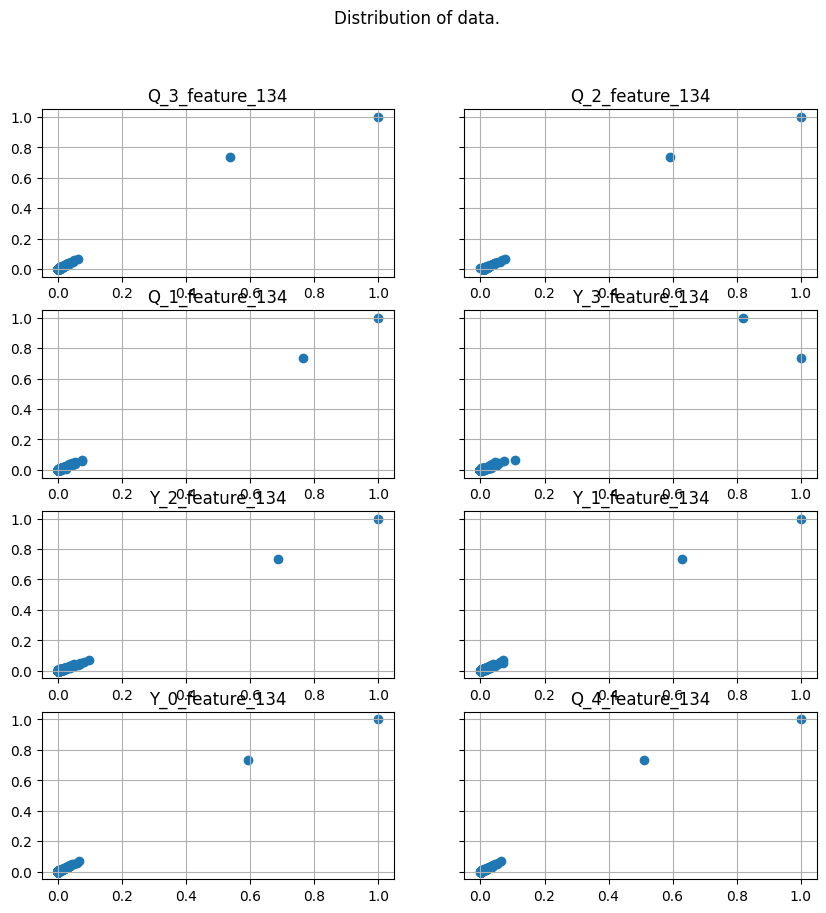

<Figure size 640x480 with 0 Axes>

In [129]:
col_lst = []
for cols in target_134.columns:
    if cols.endswith('_134'):
        col_lst.append(cols)

subset_134 = target_134[col_lst]
distplot(4,2,subset_134,'target_134')

In [130]:
X_134 = subset_134.drop('target_134',axis=1)
Y_134 = subset_134['target_134']

xtrain_134,xtest_134,ytrain_134,ytest_134 = train_test_split(X_134,Y_134,test_size=0.25,random_state=22)

In [131]:
pls_reg_134 = PLSRegression(n_components=4)
pls_reg_134.fit(xtrain_134,ytrain_134)

y134_pred_train = pls_reg_134.predict(xtrain_134)
y134_pred_test = pls_reg_134.predict(xtest_134)

print(f"r2 score on train set is {r2_score(ytrain_134,y134_pred_train)} and test set is {r2_score(ytest_134,y134_pred_test)}")
print(f"MSE score on train set is {mean_squared_error(ytrain_134,y134_pred_train)} and test set is {mean_squared_error(ytest_134,y134_pred_test)}.")

r2 score on train set is 0.999836180553716 and test set is 0.9888387290647137
MSE score on train set is 1.7290077731015648e-08 and test set is 3.2657113921284615e-08.


In [132]:
pls_134 = PLSRegression(n_components=4)
pls_134.fit(X_134,Y_134)

PLSRegression(n_components=4)

In [133]:
test_134 = test_submission(X_134,pls_134)

In [135]:
sample_submission = pd.read_csv('D:\Synnax\dataset(1)\sample_submission.csv')
sample_submission.shape

(24119, 18)

In [136]:
test_set = [test_7,test_43,test_34,test_42,test_9,test_27,test_99,\
                        test_105,test_24,test_83,test_80,test_52,\
                        test_4,test_69,test_88,test_85,test_134]

series_set = []
for val in test_set:
    series_set.append(pd.Series(val.ravel()))

series_set

submission = pd.concat([sample_submission['companyId'],*series_set],axis=1,ignore_index=True)
submission.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,company_9414,0.000018,0.001169,-0.000002,0.011630,0.005641,0.020846,-0.000002,0.000002,0.015929,0.014253,-0.000014,0.012815,0.000192,0.001144,-0.000004,0.000018,-0.000900
1,company_19475,0.000018,0.001169,-0.000002,0.011630,0.005641,0.020843,-0.000002,0.000002,0.015930,0.014253,-0.000015,0.012815,0.000192,0.001144,-0.000004,0.000018,-0.000900
2,company_7608,0.000018,0.001169,-0.000002,0.011630,0.005641,0.020846,-0.000002,0.000002,0.015929,0.014252,-0.000014,0.012815,0.000192,0.001144,-0.000004,0.000018,-0.000900
3,company_595,0.000077,0.001891,0.000100,0.012251,0.006189,0.020848,0.000284,0.000026,0.016117,0.014232,0.000699,0.013005,0.000190,0.001245,0.000131,0.000046,-0.000253
4,company_19013,0.000018,0.001169,-0.000002,0.011631,0.005641,0.020846,-0.000002,0.000002,0.015930,0.014253,-0.000015,0.012816,0.000192,0.001144,-0.000004,0.000018,-0.000900


In [137]:
submission.columns = sample_submission.columns

In [138]:
submission.to_csv('new_model_submission.csv',index=False)